In [1]:
import sys
import os
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sys.path.append(os.path.abspath("../scripts"))

In [2]:
from data_loader import load_clean_data
from metrics import get_sentiment_proportions, compute_sentiment_ratios
from metrics import compute_ratios_comfort
from visualization import (
    plot_percentages, plot_stacked_bar_chart, plot_comfort, plot_exposure, plot_income, 
    plot_stacked_bar_chart_interaction
)
from sentiment_utils import (
    compute_sentiment_metrics, interpret_metrics, plot_sentiment_trend
)

In [3]:
data_path = "../data/muslim_brand_oct_2025.csv"
oct25 = load_clean_data(data_path)

In [4]:
oct25.head()

,Start Date,End Date,What is your religion?,Religion_other,How many Muslim people have you talked to in the last 7 days?,How do you feel about Muslim people in America?,What is your level of education?,Where do you get your news from?,News_other,How comfortable do you feel interacting with Muslims in your community?,...,Would you feel comfortable buying goods or services from a Muslim-owned business?,"If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?","How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?",Do you feel you have a lot in common with Muslims in America?,"If you had questions about Islam or Muslims, where would you go to learn more?",Have you ever changed your opinion about a group of people after getting to know someone personally,Gender,Age,Major US Region,Household Income
0,10/13/2025 10:21:51 PM,10/13/2025 10:23:57 PM,Muslim,NaN,More than 10,Good,Graduate school,CNN,NaN,Very comfortable,...,Yes,Yes,A great deal,Yes,Religious Leaders,No,female,45_to_60,pacific,150000_to_174999
1,10/13/2025 09:15:42 PM,10/13/2025 09:17:14 PM,Christian (Other),NaN,None - 0,Neutral,Some College,Youtube,NaN,Neutral,...,Yes,No,A little,No,Internet,Yes,female,60_above,west_south_central,25000_to_49999
2,10/13/2025 09:10:04 PM,10/13/2025 09:11:16 PM,Atheist,NaN,None - 0,Neutral,Graduate school,Other (please specify),News Nation,Neutral,...,Yes,No,A little,No,Internet,Yes,male,45_to_60,pacific,100000_to_124999
3,10/13/2025 08:13:34 PM,10/13/2025 08:14:41 PM,Christian (Evangelical Protestant),NaN,2 to 4,Good,Graduate school,FOX News,NaN,Very comfortable,...,Yes,Yes,A great deal,Yes,Friends,No,female,45_to_60,east_north_central,25000_to_49999
4,10/13/2025 07:38:08 PM,10/13/2025 07:38:42 PM,Christian (Evangelical Protestant),NaN,5 to 10,Good,Graduate school,Twitter,NaN,Very comfortable,...,Yes,No,A great deal,Yes,Friends,Yes,female,45_to_60,mountain,150000_to_174999


In [6]:
oct25.columns

Index(['What is your religion?', 'Religion_other',
       'How many Muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Would you feel comfortable buying goods or services from a Muslim-owned business?',
       'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?',
       'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?',
       'Do you feel you have a lot in common with Muslims in America?',
       'If you had questions about Islam or Muslims, where would 

# Categories

1. Religion
2. Levels of Exposure
3. Education
4. News Source
5. Income Level
6. Gender
7. Age
8. Major US Region


# Questions

1. 'How do you feel about Muslim people in America?'
2. 'How comfortable do you feel interacting with Muslims in your community?'
3. 'How often do you hear positive things about Muslims in the media?'
4.   'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?'
5. 'Would you feel comfortable buying goods or services from a Muslim-owned business?'
6. 'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?'
7. 'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?'
8. 'Do you feel you have a lot in common with Muslims in America?'
9. 'If you had questions about Islam or Muslims, where would you go to learn more?',
10. 'Have you ever changed your opinion about a group of people after getting to know someone personally'

# Current State of Muslims In the United States (July 2025-October 2025)

Here is a collection of articles circulating in the media during this time-frame. This could be a useful resource as we try and understand world events shaping these responses.

- October 17 2025: Political campaign surge in Islamophobia: The run of Zohran Mamdani in NYC has triggered intensified anti-Muslim rhetoric and scrutiny of his associations. \

- October 15 2025: Mosque expansion plans divide Long Island community. a Long Island town says its resistance to the expansion of a local mosque is based on traffic and public safety, but mosque leaders believe it’s due to anti-Muslim prejudice

- October 9 2025: Israel–Hamas ceasefire and hostages‑prisoners exchange
- October 19 2025: Israeli airstrikes resumed, citing breach of the truce

| Date                    | Headline & Source                                                                                                                                                          | Why It Matters                                                                                                                                                                                           |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Oct 20                  | **“Stefanik, Cotton urge Trump administration to probe Council on American‑Islamic Relations (CAIR) over ‘potential ties’ to Hamas”** — New York Post ([New York Post][1]) | Shows how U.S. political figures are challenging a major Muslim-American organization, signalling intense scrutiny and suspicion of Muslim institutions.                                                 |
| Oct 15                  | **“More U.S. Jews shield identity in public amid antisemitism fears, Post poll finds”** — Washington Post ([The Washington Post][2])                                       | While about Jewish Americans, this poll provides context: religious minorities (including Muslims) may feel vulnerable. Helps understand broader climate of religious-minority fear in the U.S.          |
| Oct 22 (or recent)      | **“FBI says a Louisiana resident assisted Hamas and lied on his U.S. visa application”** — Associated Press ([AP News][3])                                                 | Direct intersection of national security, immigration, Muslims, and U.S. legal system: may influence public perception of Muslims in America.                                                            |
| Oct 20                  | **“Alleged pro-Hamas Oct. 7 attacker granted religious accommodations while jailed in U.S.”** — New York Post ([New York Post][4])                                         | Highlights tension between religious accommodation rights and public outrage when the accused is linked to terrorism — complicates how Muslim religious practices are viewed.                            |
| Oct 20                  | **“Muslim groups call U.S. lawmakers to condemn Islamophobic remarks”** — Algemeiner ([Algemeiner.com][5])                                                                 | Shows activism from Muslim-American groups responding to perceived bias in Congress — relevant to how Muslim Americans see their political power and vulnerability.                                      |
| Oct 09                  | **“American Jews and Muslims celebrate cease-fire deal, but cautiously”** — ReligionNewsService ([RNS][6])                                                                 | Demonstrates how global events (Israel-Gaza ceasefire) resonate within American Muslim communities and how that affects their stance on U.S. foreign policy.                                             |
| Oct 08                  | **“’I don’t feel safe any more’: Dearborn’s Arab Americans on rising Islamophobia”** — The Guardian ([The Guardian][7])                                                    | Focuses on Arab-American/Muslim experiences in a U.S. city, showing lived fears and local community response. Very relevant to “views of Americans” and how Muslims feel they are seen.                  |
| Oct 06                  | **“How American views on Israel and antisemitism have changed since Oct. 7”** — PBS NewsHour ([PBS][8])                                                                    | While focused on Jews/Israel, this shows how U.S. public opinion shifts in tandem with Middle East events — helps illuminate backdrop for Muslim-American views too.                                     |
| Oct 20                  | **“Religion Is Gaining Influence in American Life, More U.S. Adults Say”** — Pew Research ([Pew Research Center][9])                                                       | Offers quantitative context: more Americans feel their religious beliefs conflict with mainstream culture — helpful for understanding how Muslims (as religious minorities) might fit into that tension. |
| ~Sept (date in article) | **“Sen. Cornyn of Texas says federal probe started into Muslim-centered community near Dallas”** — Associated Press ([AP News][10])                                        | A case of U.S. government investigation targeting a Muslim-centered development, highlighting institutional pressures on Muslim communities in America.                                                  |

[1]: https://nypost.com/2025/10/14/us-news/elise-stefanik-tom-cotton-push-trump-admin-to-probe-cair-for-potential-hamas-financial-link/?utm_source=chatgpt.com "Stefanik, Cotton urge Trump administration to probe CAIR over 'potential ties' to Hamas"
[2]: https://www.washingtonpost.com/nation/2025/10/15/us-jews-poll-safety-antisemitism/?utm_source=chatgpt.com "More U.S. Jews shield identity in public amid antisemitism fears, Post poll finds"
[3]: https://apnews.com/article/70361e09338f9f669ab1beade9af2ad9?utm_source=chatgpt.com "FBI says a Louisiana resident assisted Hamas and lied on his US visa application"
[4]: https://nypost.com/2025/10/20/us-news/alleged-pro-hamas-oct-7-attacker-granted-religious-accommodations-while-jailed/?utm_source=chatgpt.com "Alleged pro-Hamas Oct. 7 attacker granted religious accommodations while jailed in Louisiana"
[5]: https://www.algemeiner.com/2025/10/20/muslim-groups-call-us-lawmakers-condemn-jewish-rep-randy-fine-islamophobic-attack-mamdani/?utm_source=chatgpt.com "Muslim Groups Call on US Lawmakers to Condemn Jewish ..."
[6]: https://religionnews.com/2025/10/09/american-jews-and-muslims-celebrate-ceasefire-deal-but-cautiously/?utm_source=chatgpt.com "American Jews and Muslims celebrate ceasefire deal, but ..."
[7]: https://www.theguardian.com/us-news/2025/oct/08/arab-americans-michigan-dearborn-trump?utm_source=chatgpt.com "'I don't feel safe any more': Dearborn's Arab Americans on rising Islamophobia"
[8]: https://www.pbs.org/newshour/nation/how-american-views-on-israel-and-antisemitism-have-changed-since-oct-7?utm_source=chatgpt.com "How American views on Israel and antisemitism have ..."
[9]: https://www.pewresearch.org/religion/2025/10/20/growing-share-of-us-adults-say-religion-is-gaining-influence-in-american-life/?utm_source=chatgpt.com "Religion Is Gaining Influence in American Life, More U.S. ..."
[10]: https://apnews.com/article/d46c19cf662f249e24a3db12aee2395c?utm_source=chatgpt.com "Sen. Cornyn of Texas says federal probe started into Muslim-centered community near Dallas"


# Compute Key Metrics

In [18]:
# Sentiment proportions
sentiment_prop = get_sentiment_proportions(oct25, 'How do you feel about Muslim people in America?')
display(sentiment_prop)

# Ratios
pos_neg_ratio, pos_neutral_ratio = compute_sentiment_ratios(oct25, \
                                                            'How do you feel about Muslim people in America?')
net_sentiment_oct_25 = sentiment_prop.iloc[0,1]-sentiment_prop.iloc[2,1]
net_sentiment_july_25= 57.66

print(f"Positive to Negative Ratio: {pos_neg_ratio:.2f}")
print(f"Positive to Neutral Ratio: {pos_neutral_ratio:.2f}")
print(f"Net Sentiment Score: {net_sentiment_oct_25:.2f}")
print(f"Quartely change in net sentiment score:{net_sentiment_oct_25-net_sentiment_july_25}")


,Category,Percentage
0,Good,56.910569
1,Neutral,35.772358
2,Bad,7.317073


Positive to Negative Ratio: 7.78
Positive to Neutral Ratio: 1.59
Net Sentiment Score: 49.59
Quartely change in net sentiment score:-8.066504065040647


# Comfort Metric

In [19]:
question = 'How comfortable do you feel interacting with Muslims in your community?'
comfort_level = get_sentiment_proportions(oct25, question)

In [20]:
comfort_level

,Category,Percentage
0,Very comfortable,41.463415
1,Comfortable,34.146341
2,Neutral,17.886179
3,Uncomfortable,6.504065


In [21]:
ratios = compute_ratios_comfort(comfort_level)

In [22]:
ratios

Very comfortable / Neutral          2.318182
Comfortable / Neutral               1.909091
Very comfortable / Uncomfortable    6.375000
Comfortable / Uncomfortable         5.250000
Name: Ratio, dtype: float64

# Visualizations

# Overall Public Opinion

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Public_Opinion_on_Muslims_October_2025.png


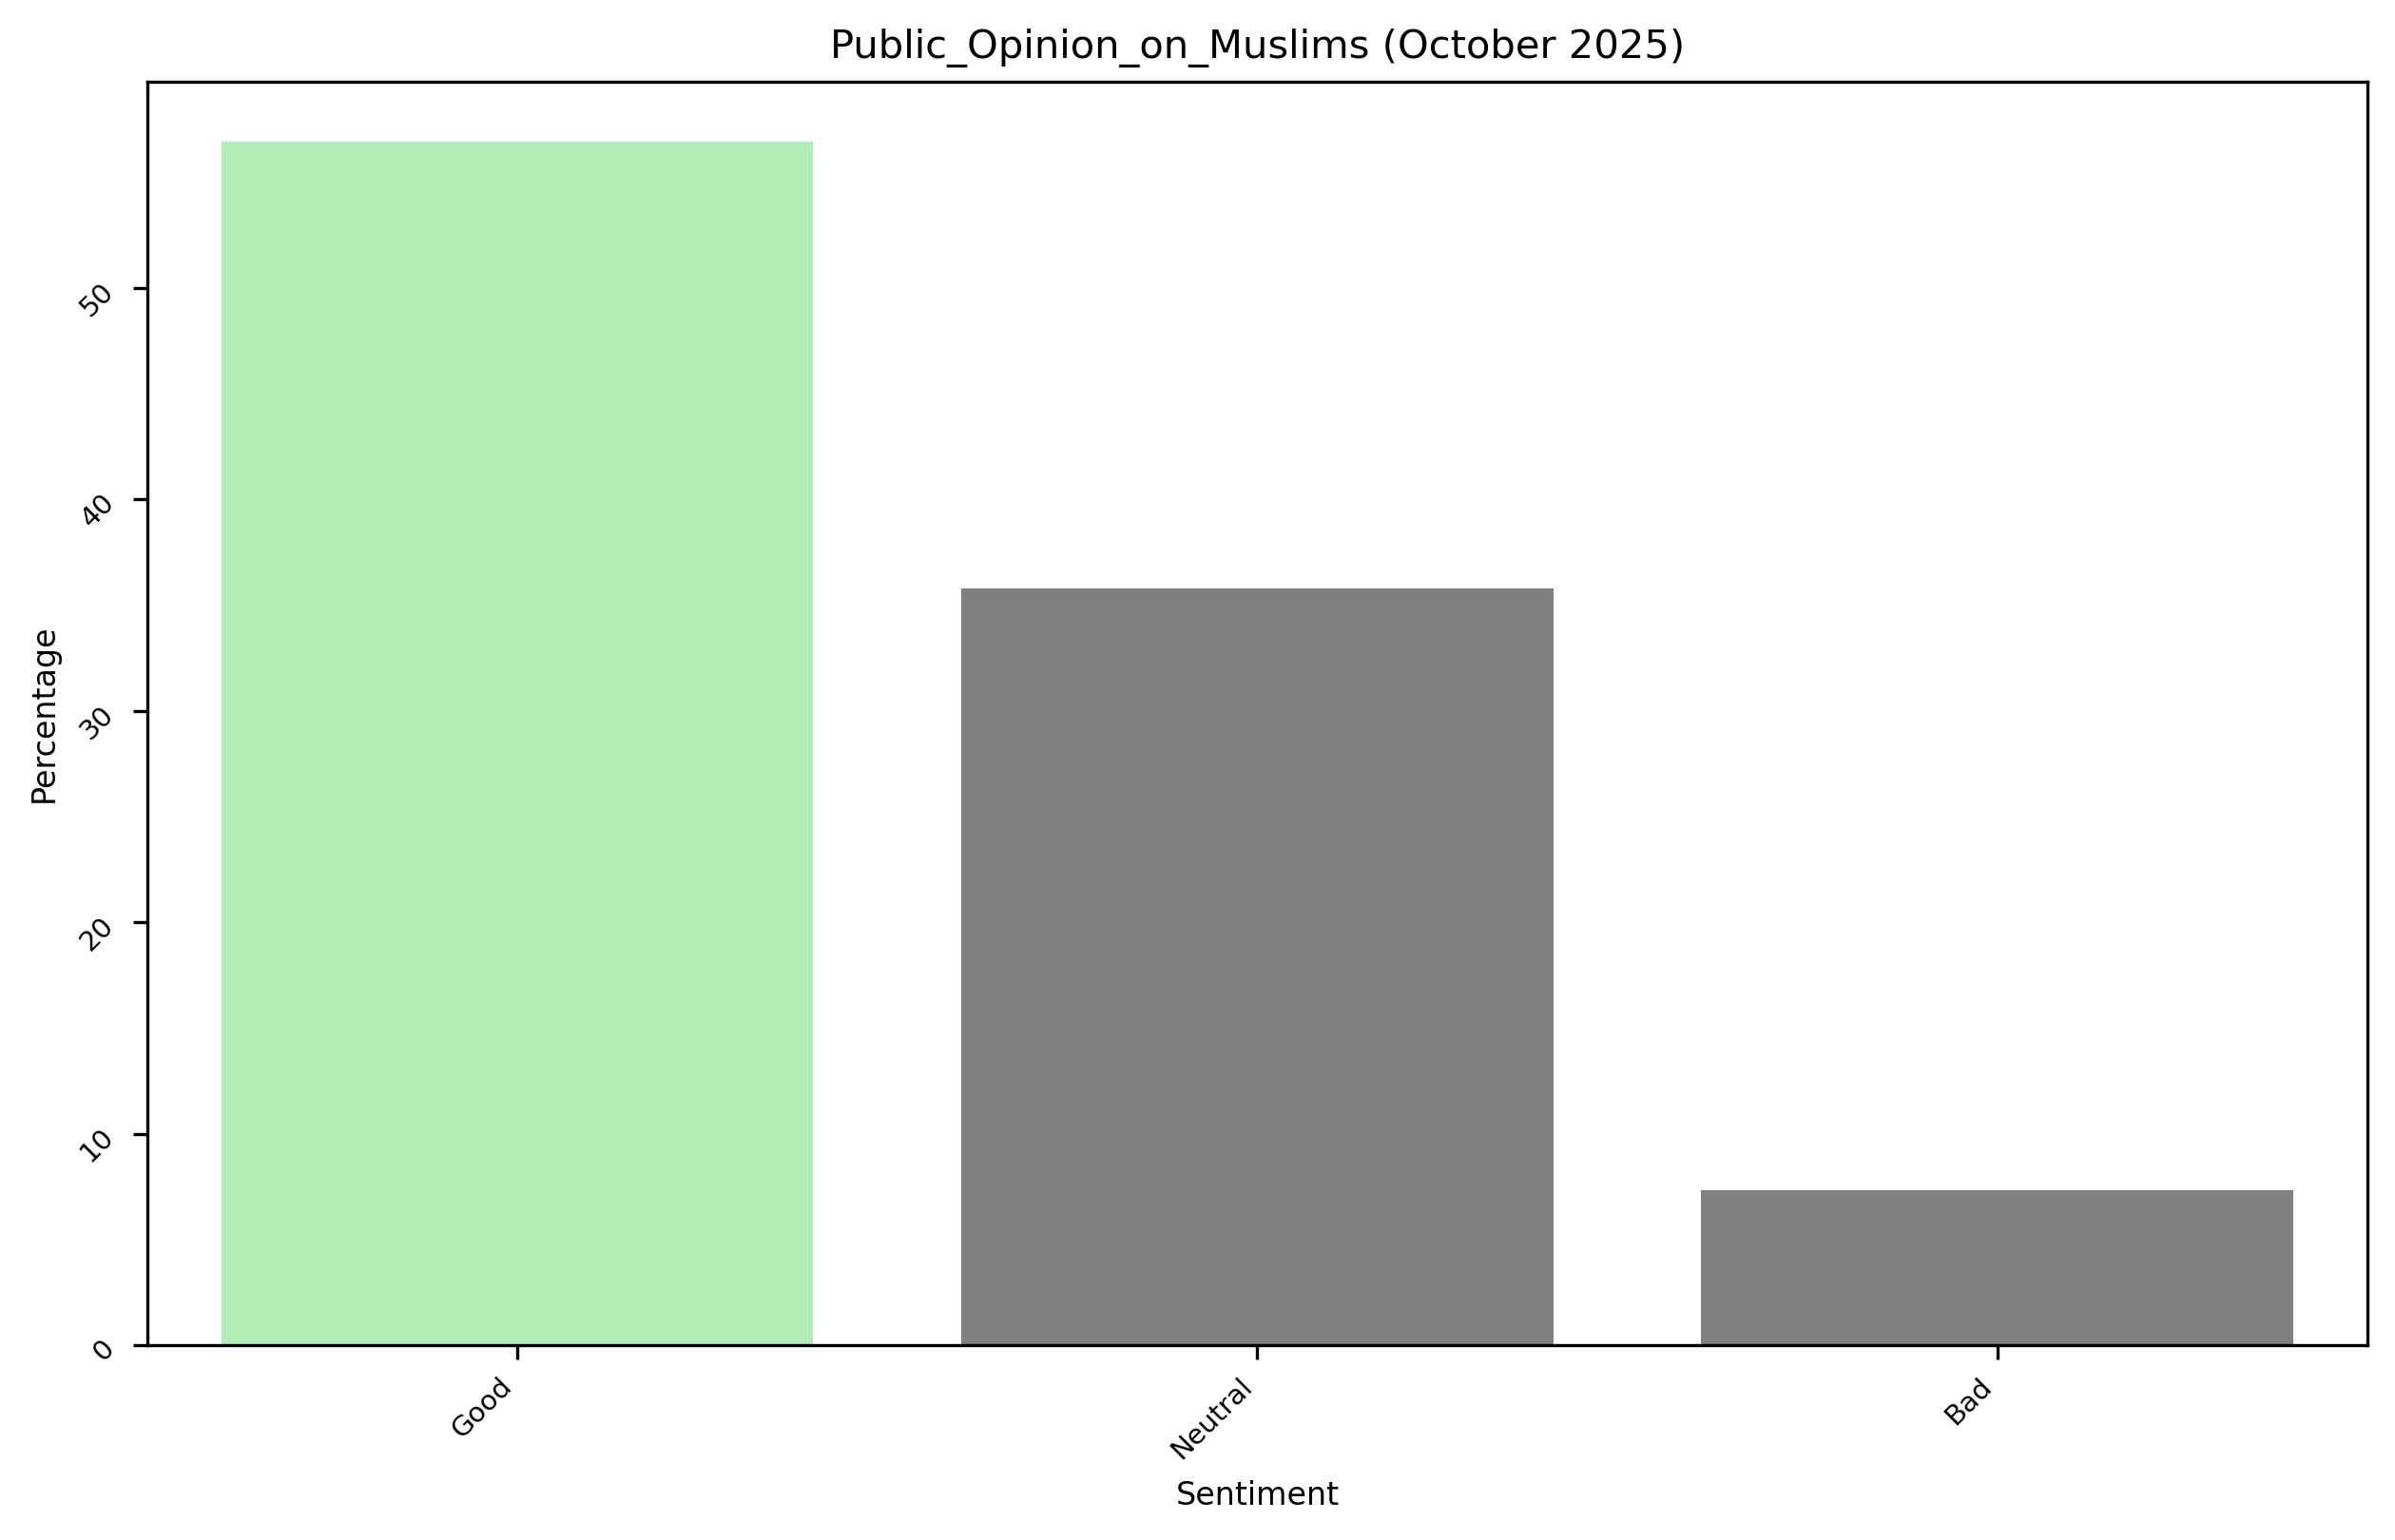

In [23]:
plot_percentages(oct25,
                 column_name='How do you feel about Muslim people in America?',
                 x_label='Sentiment',
                 title='Public_Opinion_on_Muslims (October 2025)')

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Comfort_levels_Around_Muslims_in_America_October_2025.png


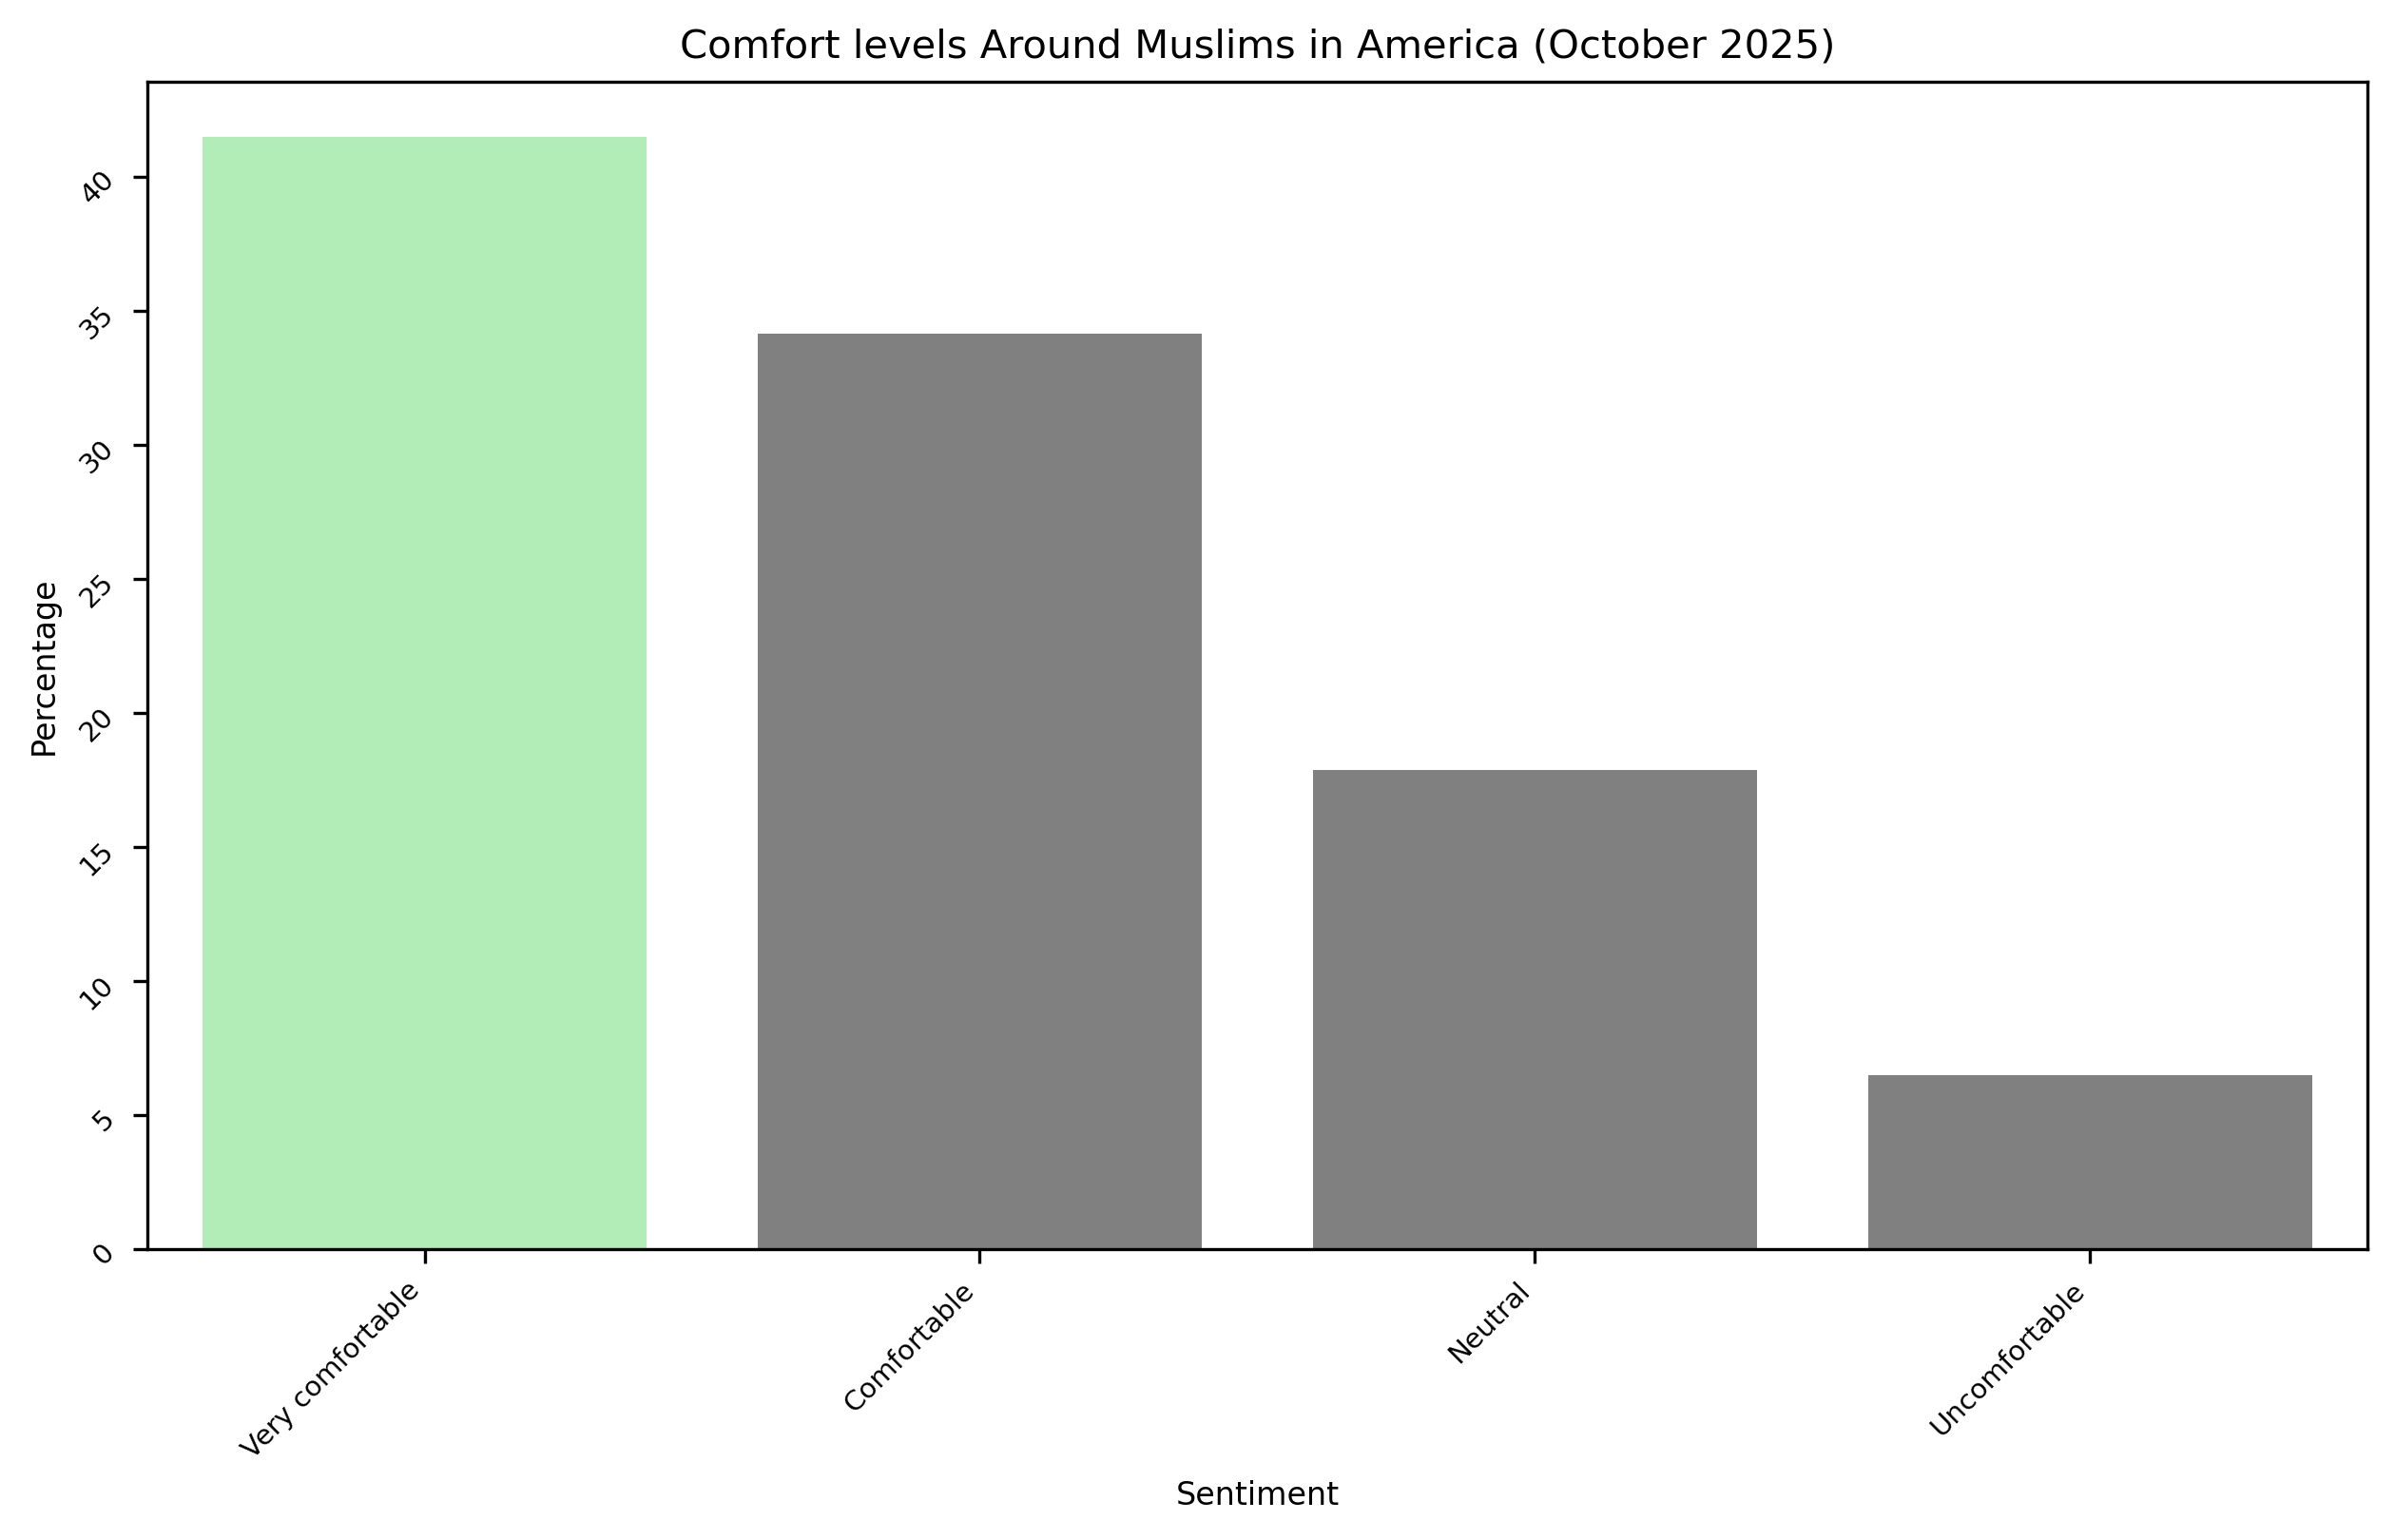

In [24]:
plot_percentages(oct25,
                 column_name='How comfortable do you feel interacting with Muslims in your community?',
                 x_label='Sentiment',
                 title='Comfort levels Around Muslims in America (October 2025)')

# Religion Vs. Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Distribution_of_Religion_October_2025.png


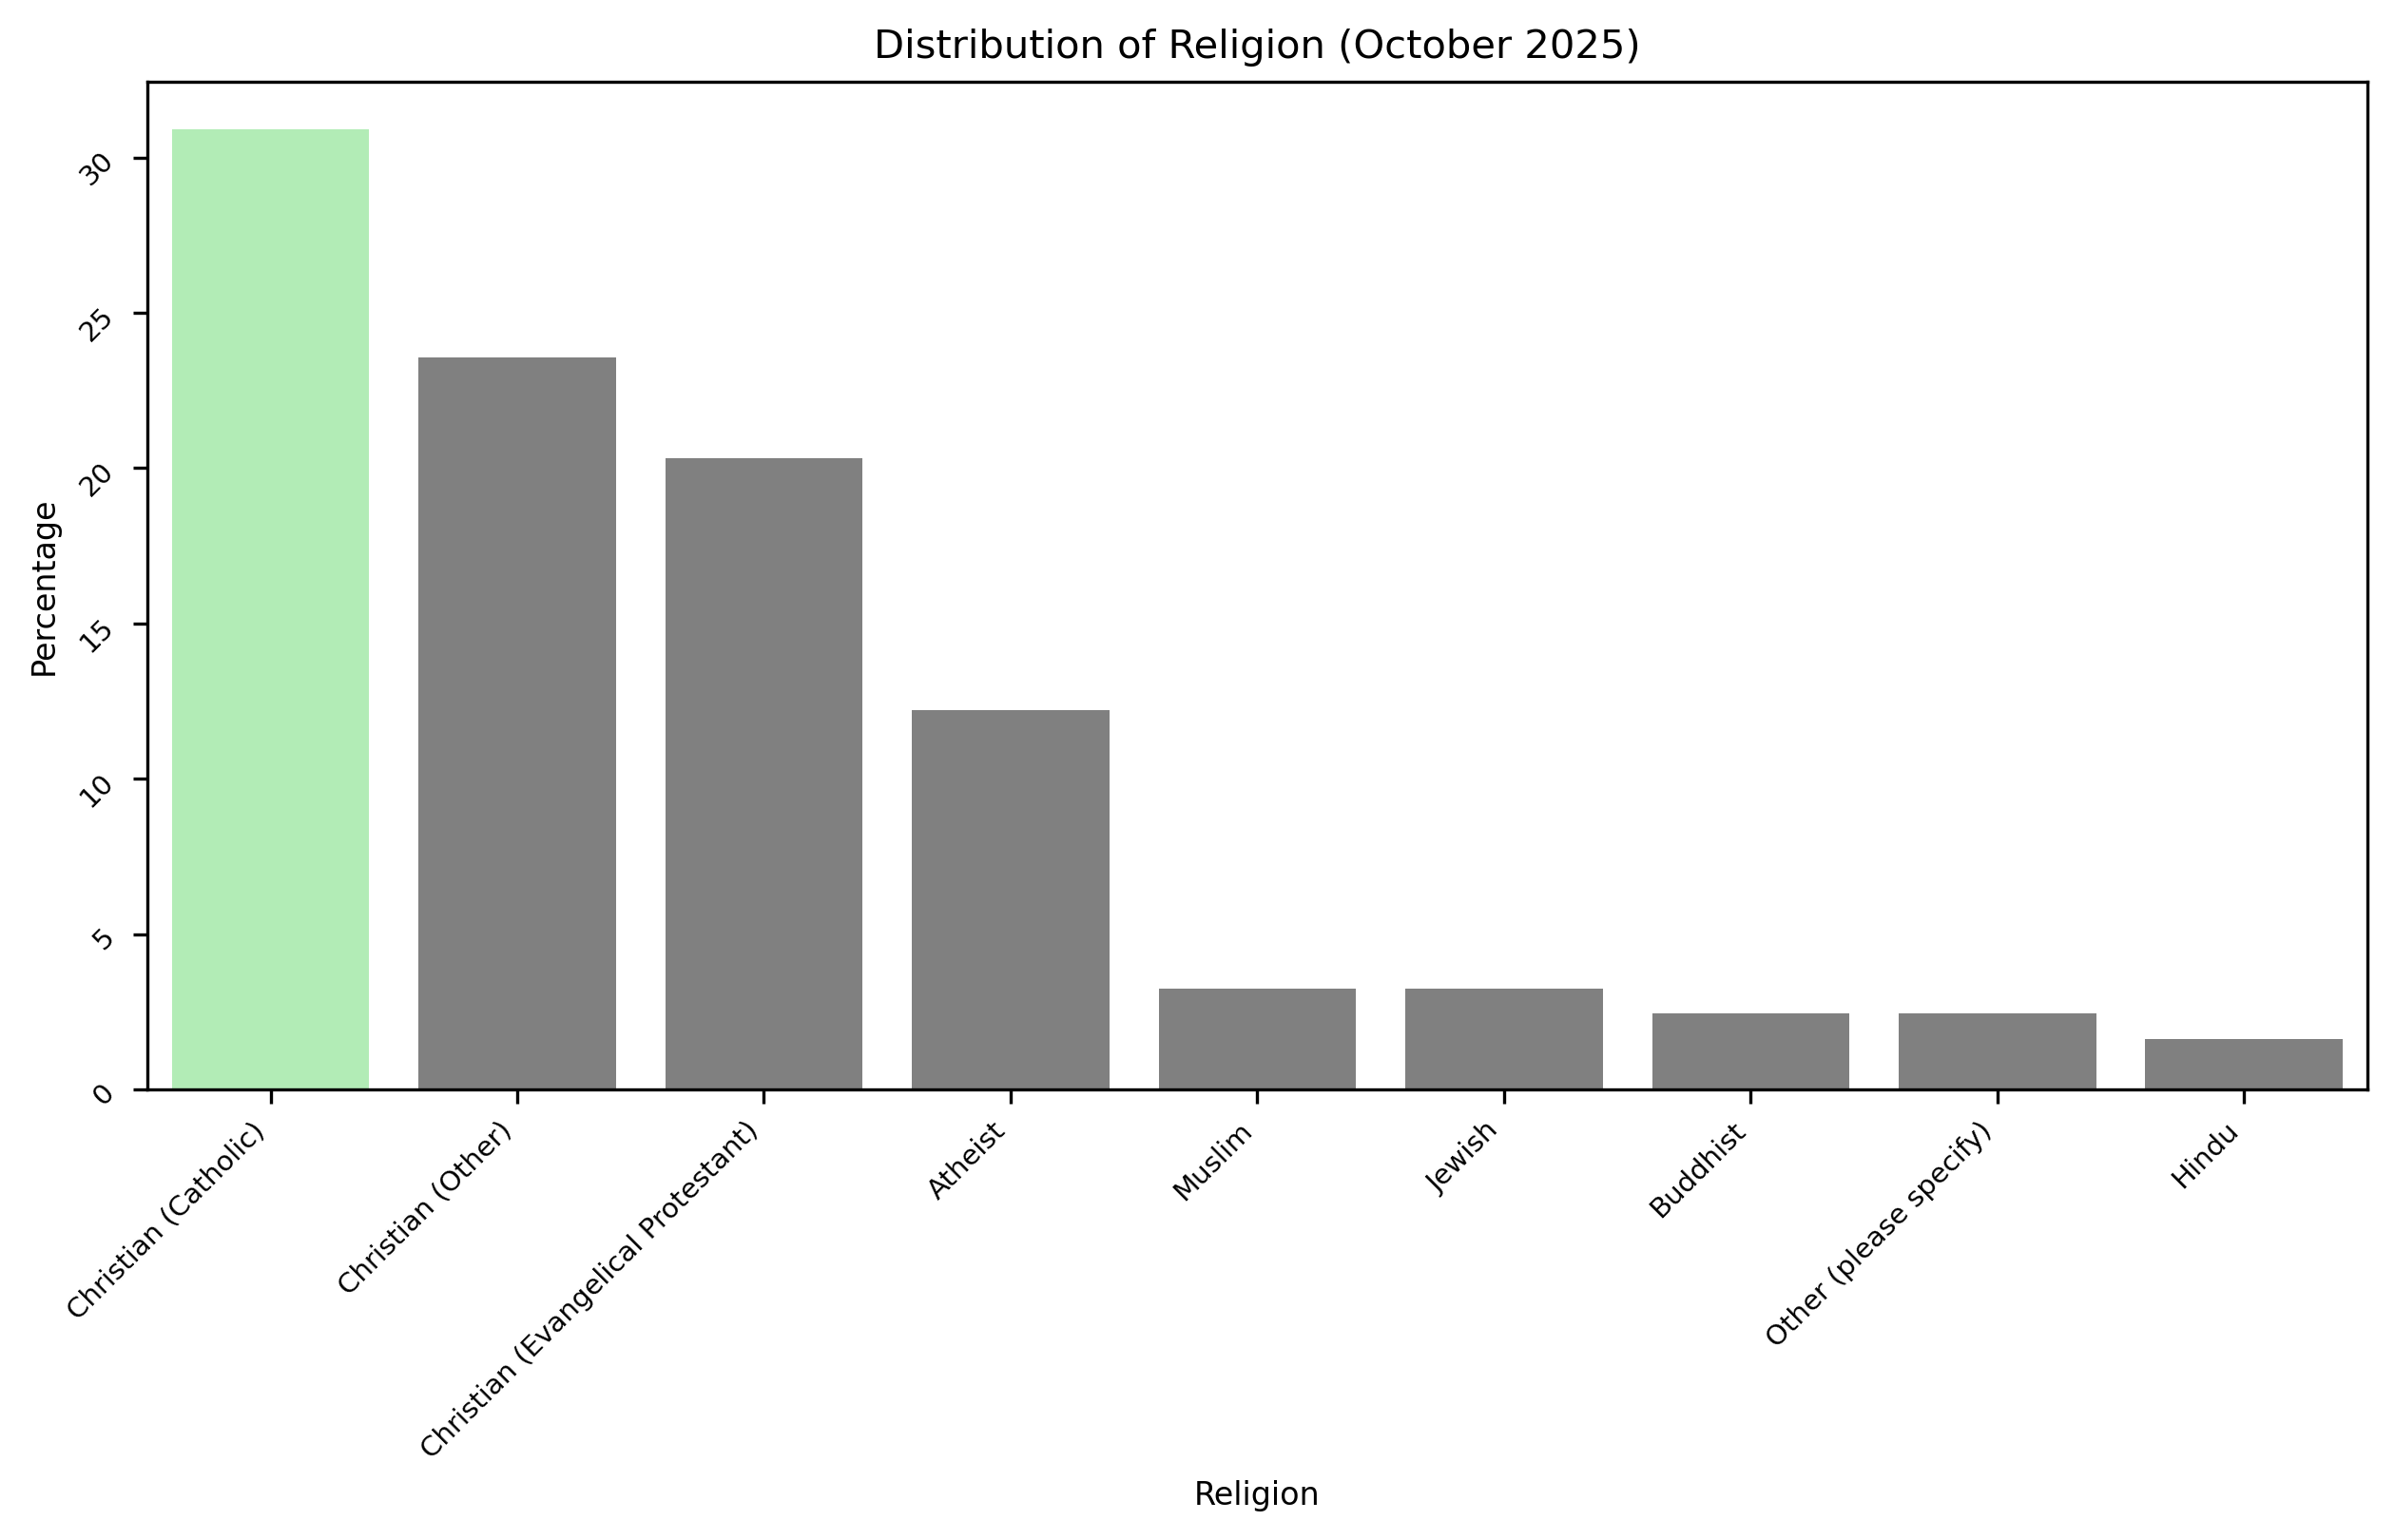

In [25]:
plot_percentages(oct25,
                 column_name='What is your religion?',
                 x_label='Religion',
                 title='Distribution of Religion (October 2025)')

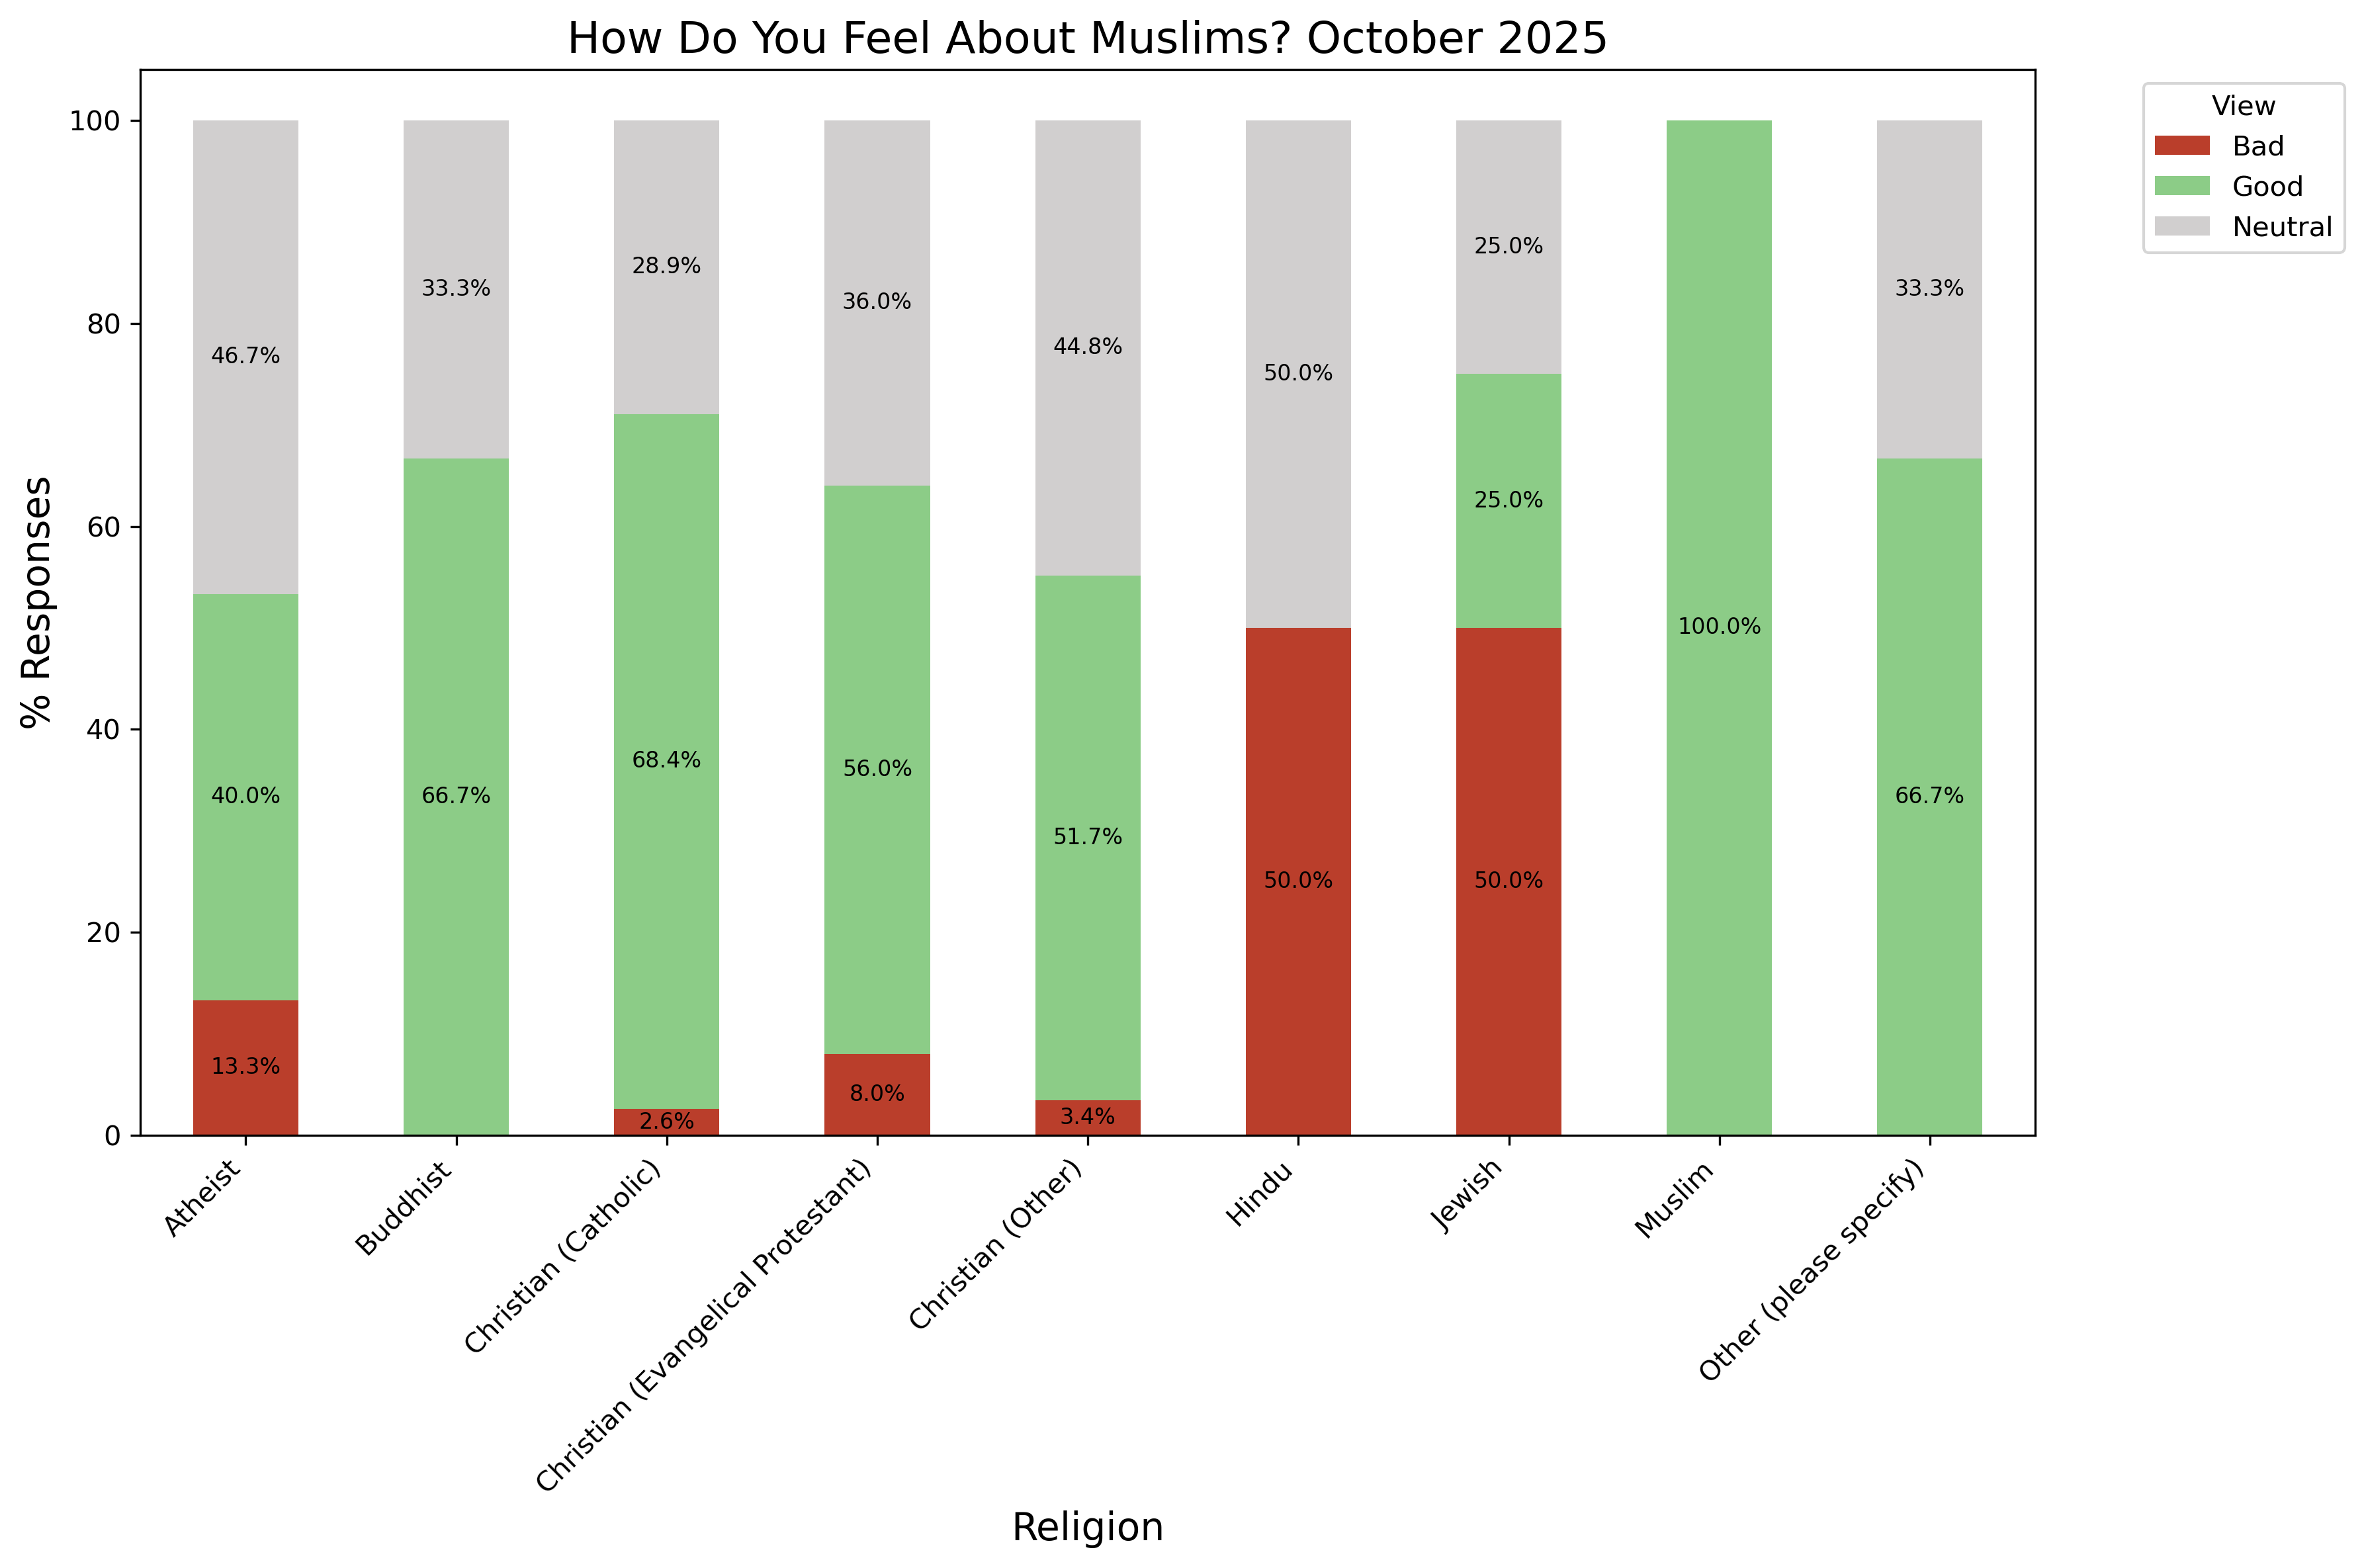

In [27]:
plot_stacked_bar_chart(oct25,
                       title='How Do You Feel About Muslims? October 2025',
                       xlabel='Religion',
                       ylabel='% Responses',
                       cat_col='What is your religion?',
                       sent_col='How do you feel about Muslim people in America?')

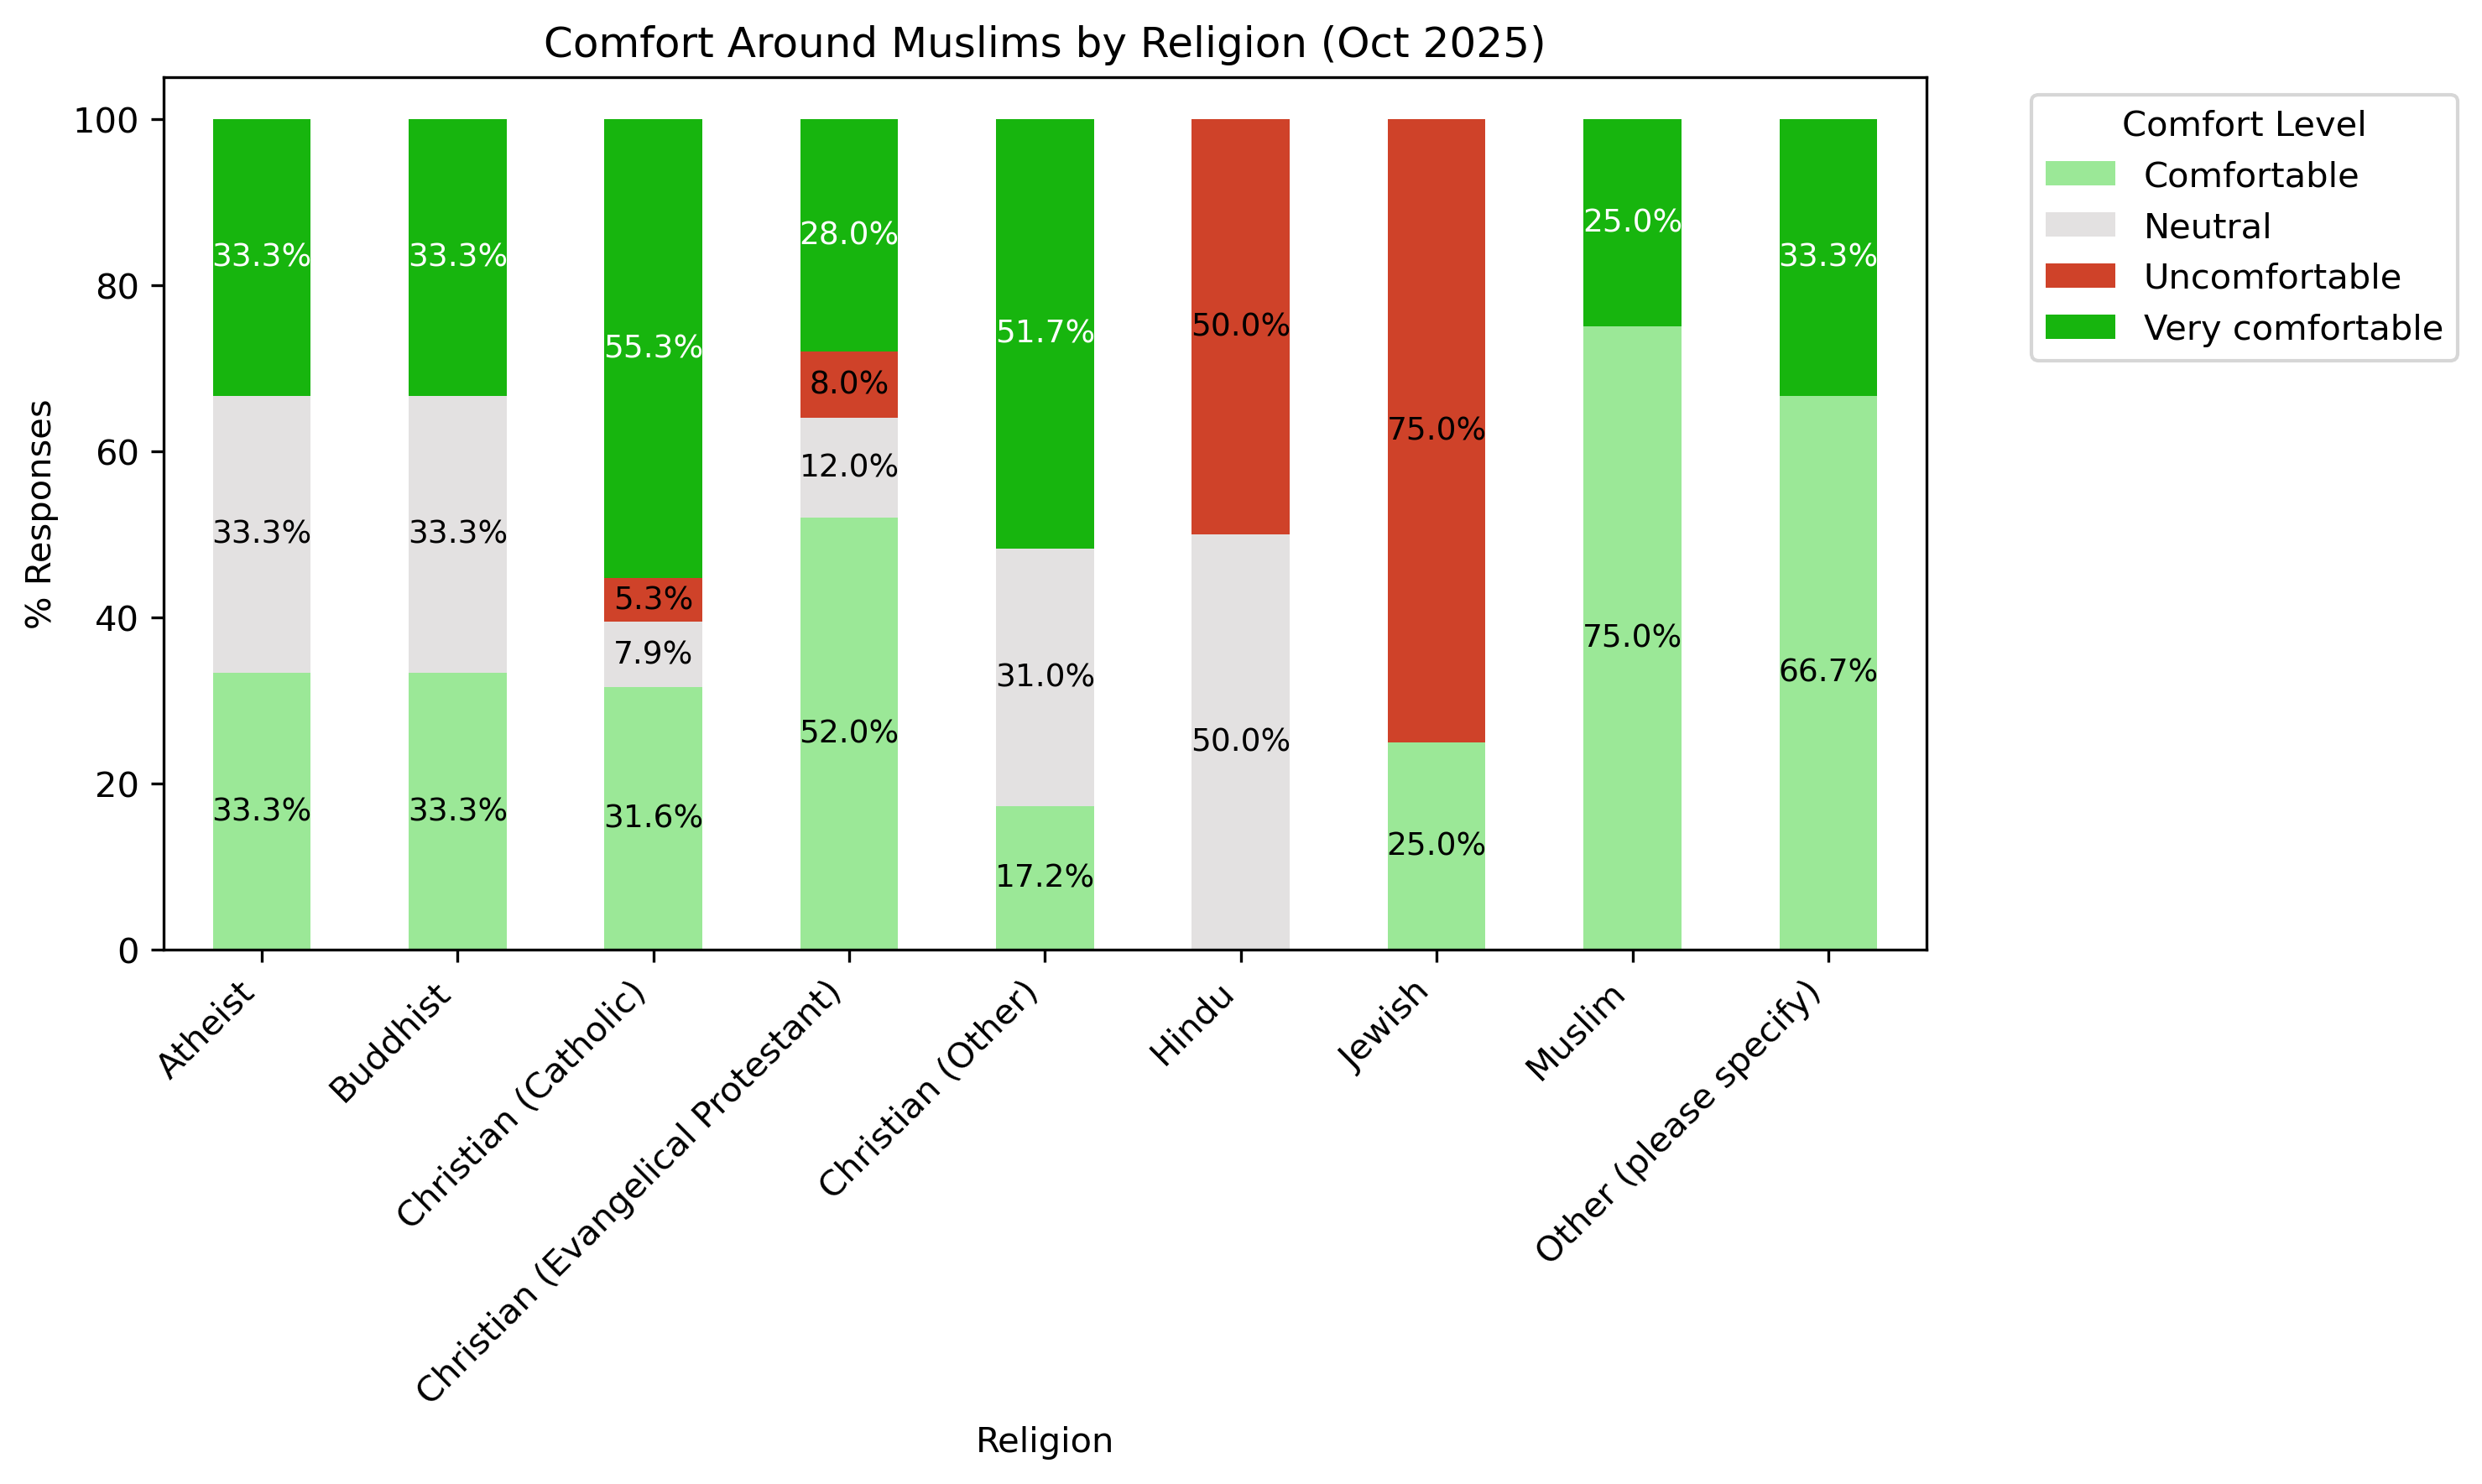

In [28]:
plot_comfort(oct25,
             category_col='What is your religion?',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Religion (Oct 2025)',
             xlabel='Religion',
             ylabel='% Responses')

# Gender Vs. Sentiment

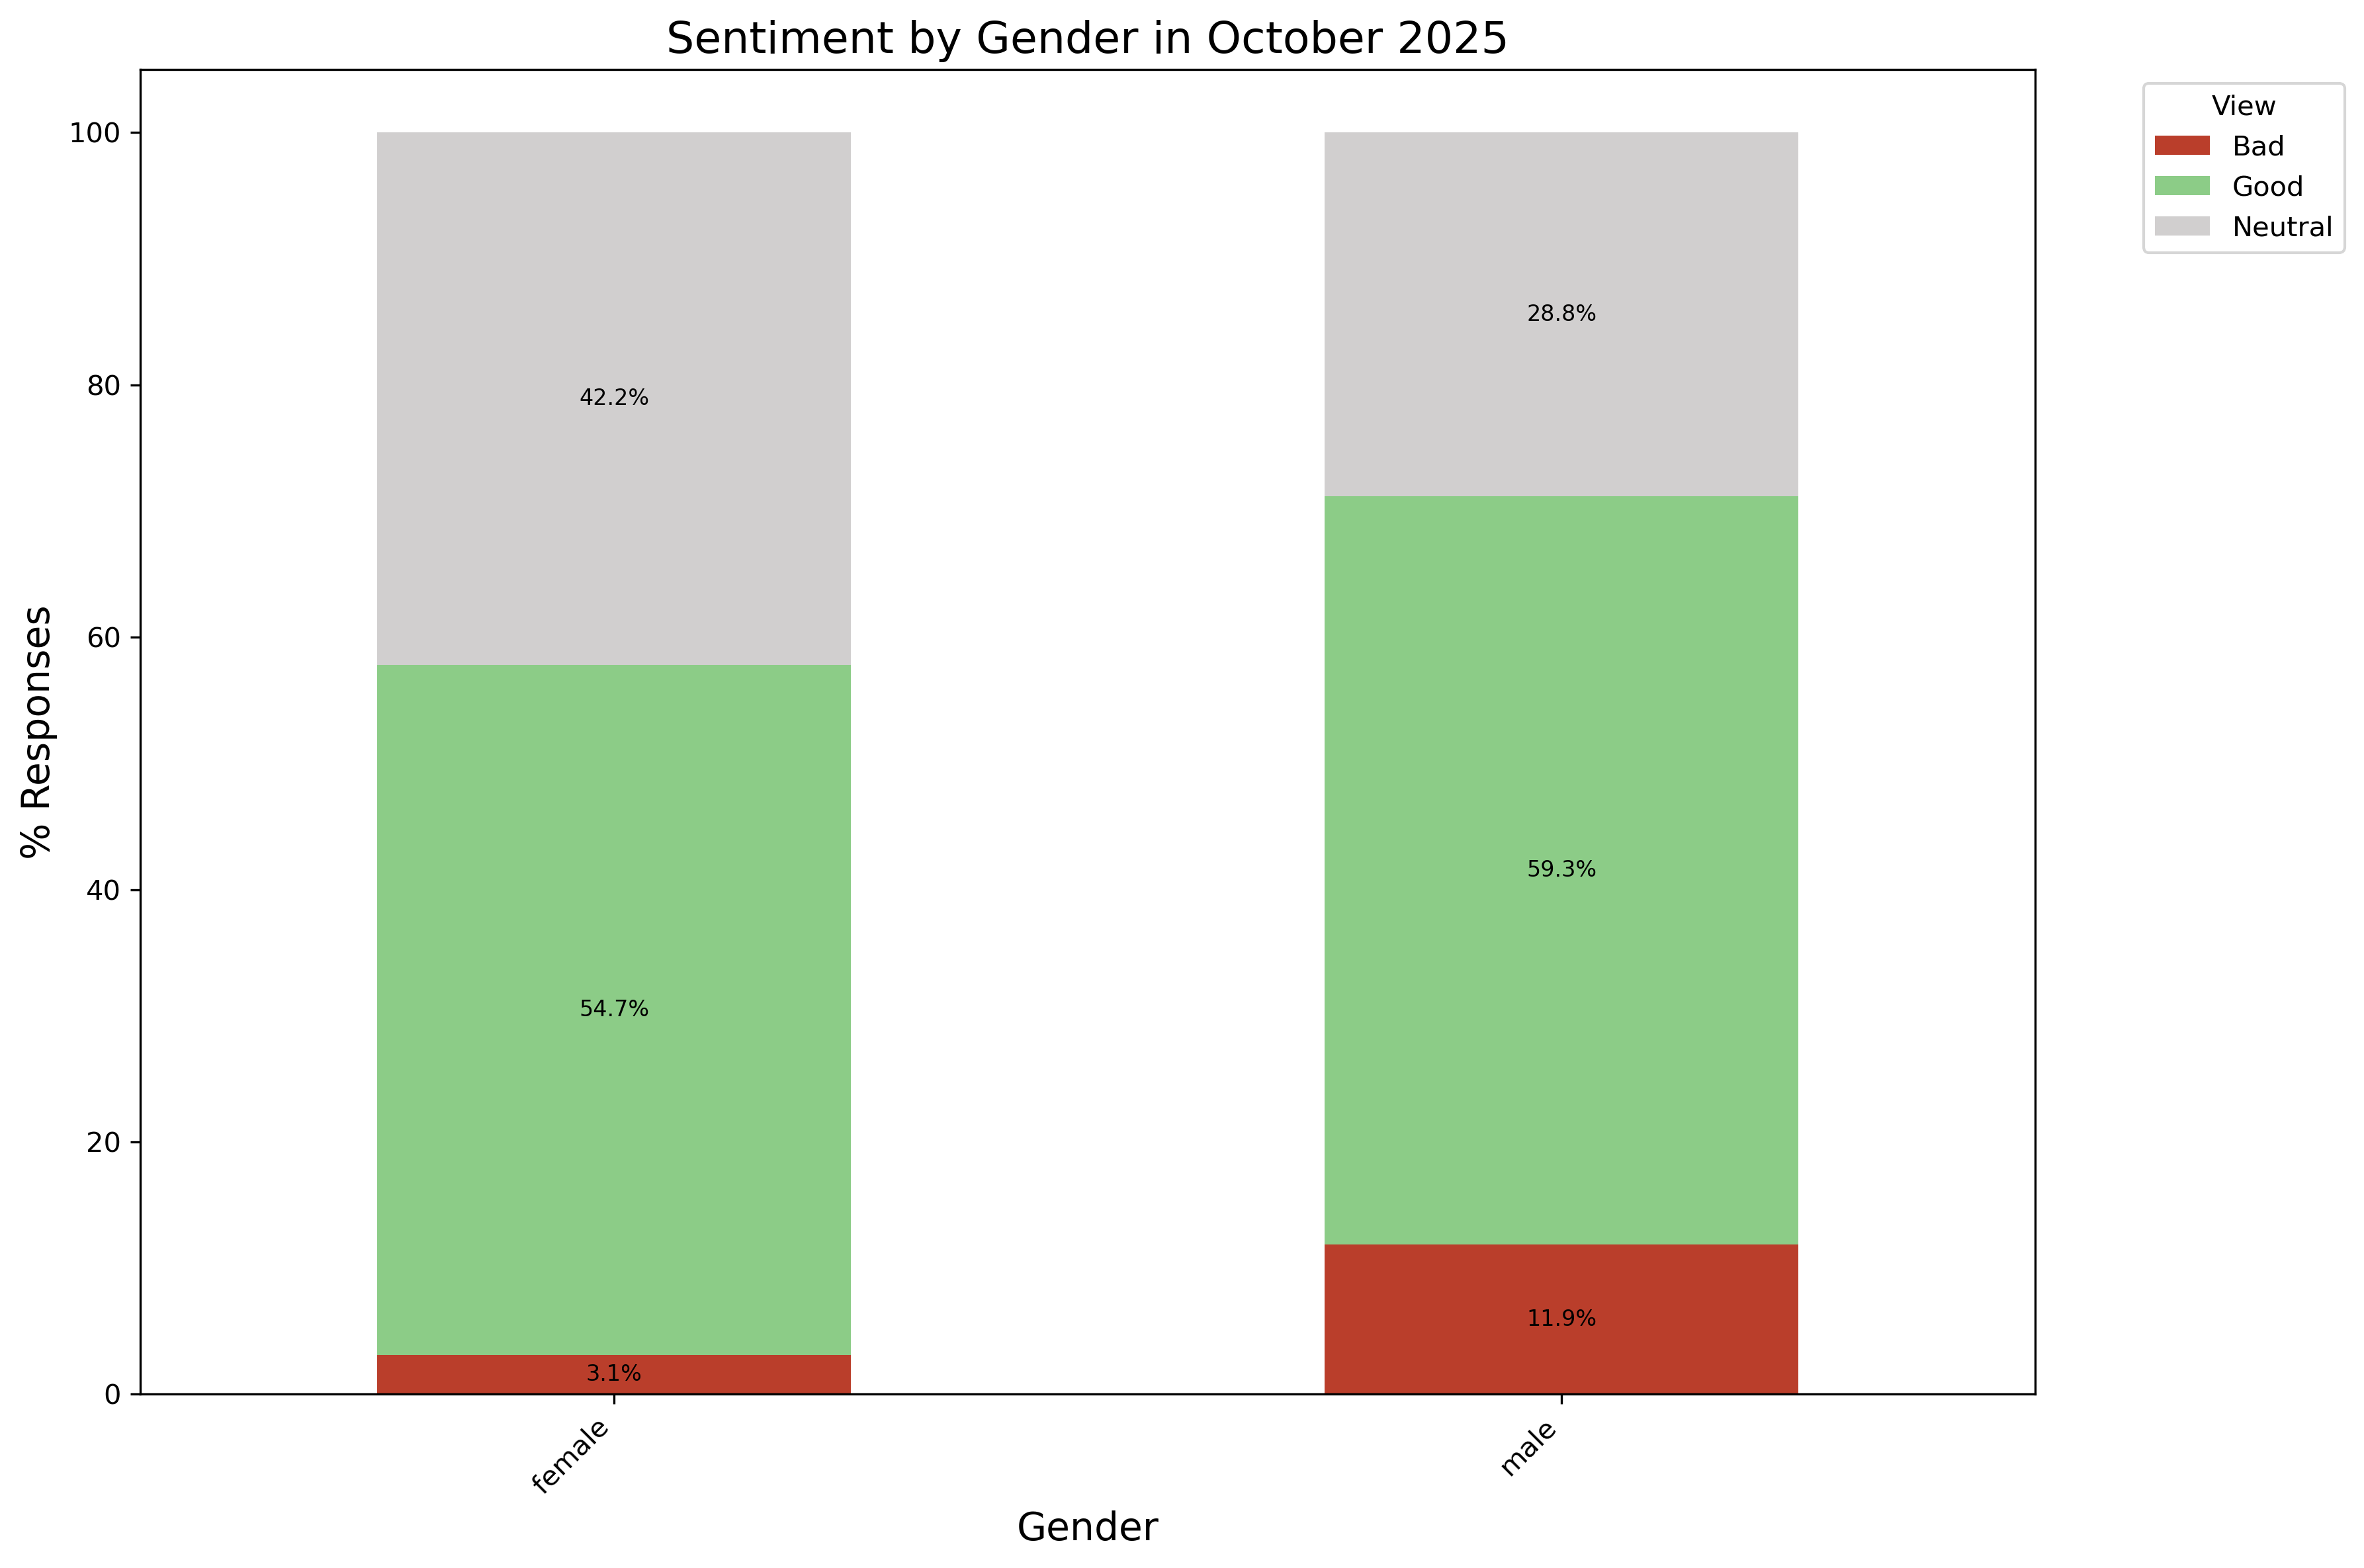

In [29]:
plot_stacked_bar_chart(oct25,
                       title='Sentiment by Gender in October 2025',
                       xlabel='Gender',
                       ylabel='% Responses',
                       cat_col='Gender',
                       sent_col='How do you feel about Muslim people in America?')

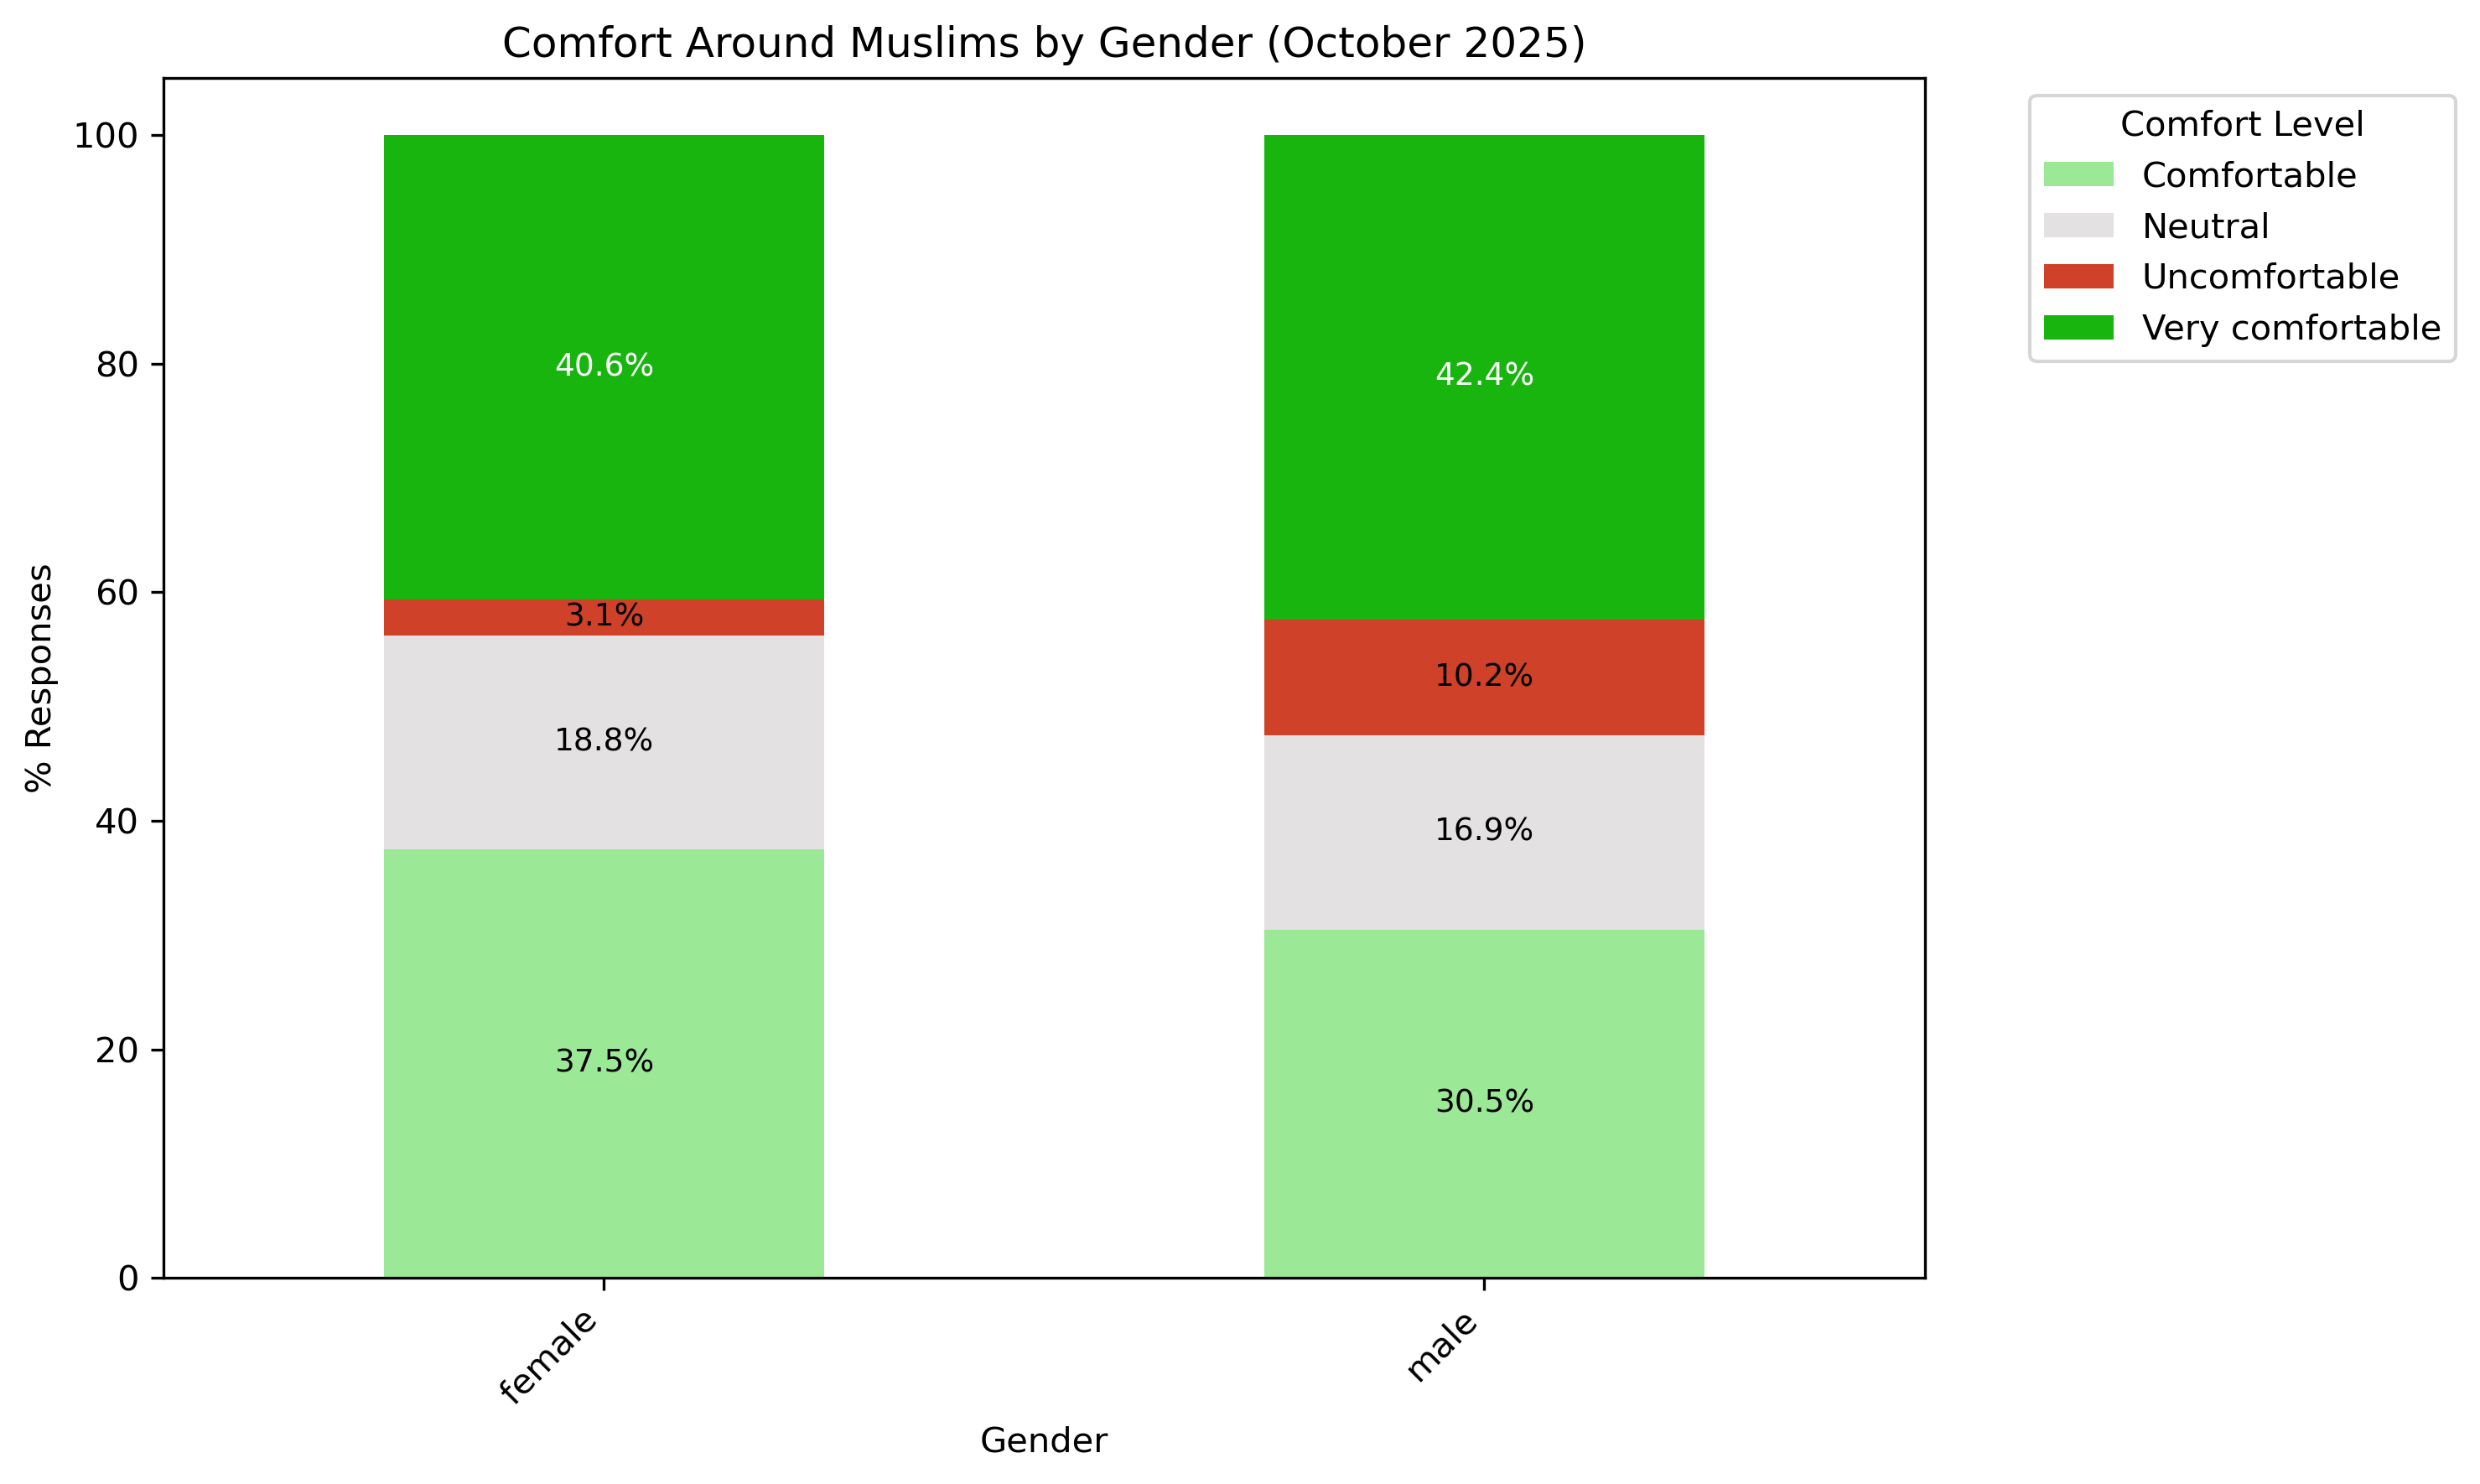

In [31]:
plot_comfort(oct25,
             category_col= 'Gender',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Gender (October 2025)',
             xlabel='Gender',
             ylabel='% Responses')

# Education Vs. Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/The_Majority_of_Those_Surveyed_Hold_Degrees_In_Higher_Education.png


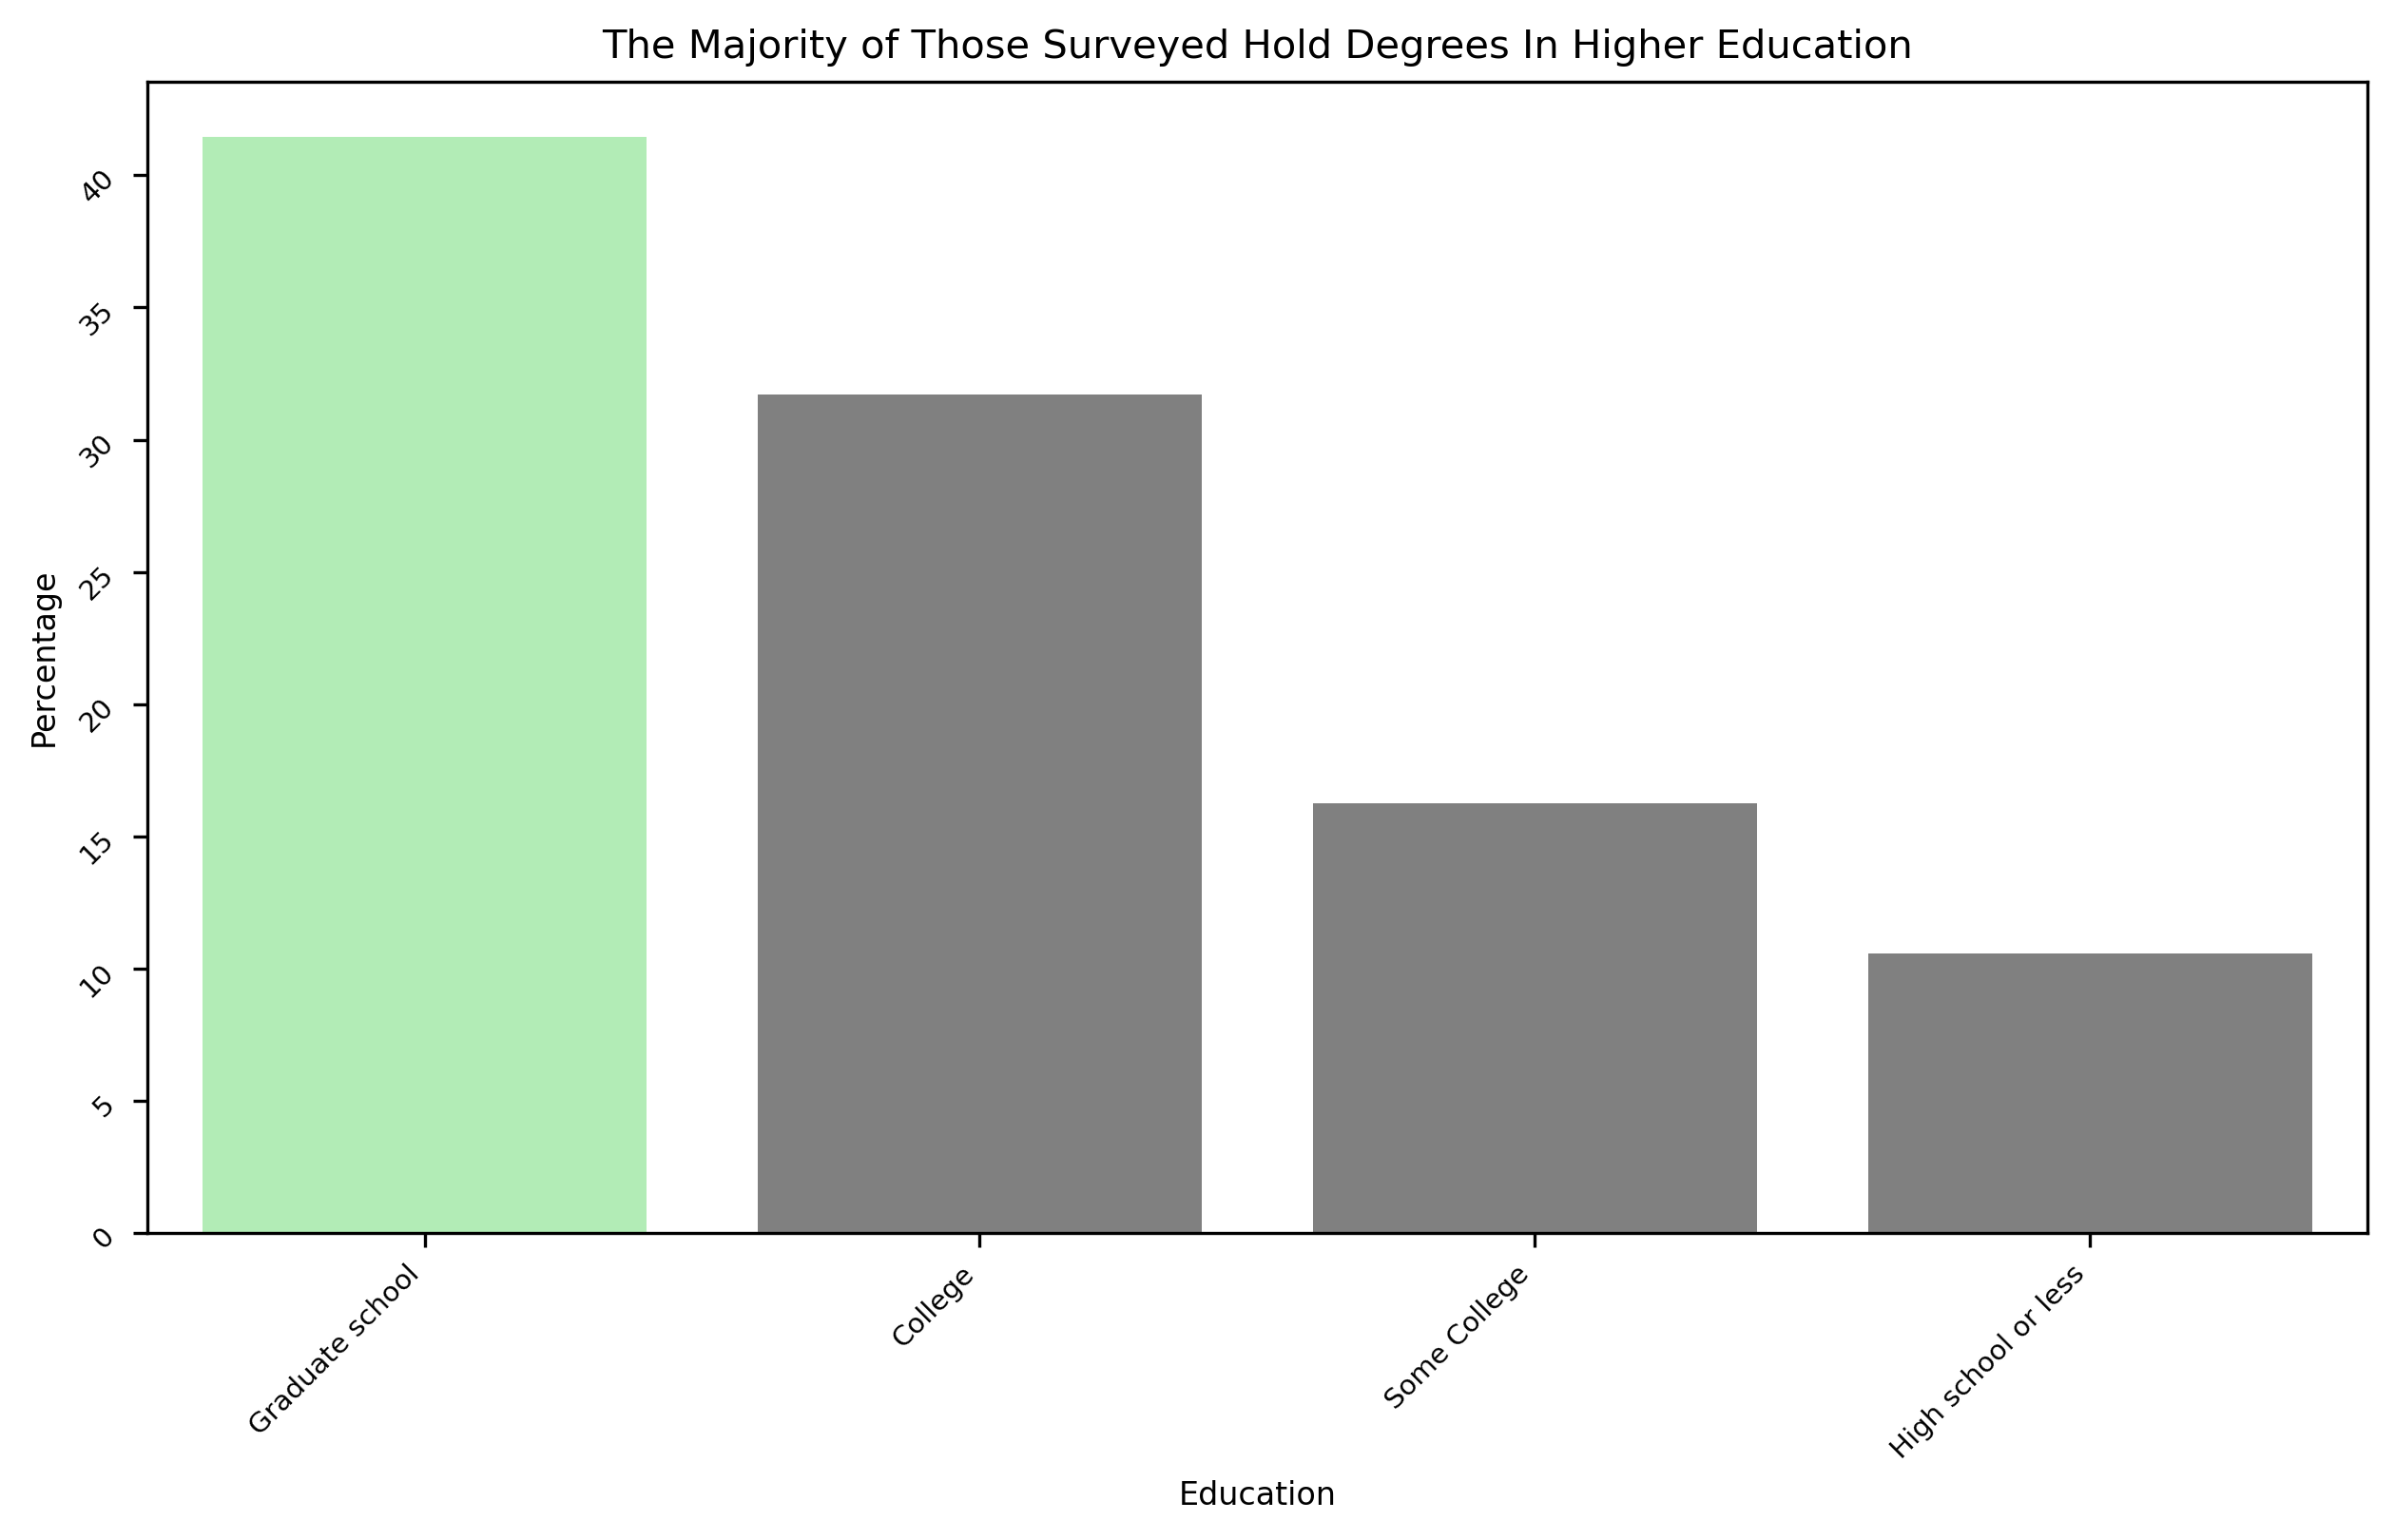

In [32]:
plot_percentages(oct25,'What is your level of education?', 'Education',
           'The Majority of Those Surveyed Hold Degrees In Higher Education')

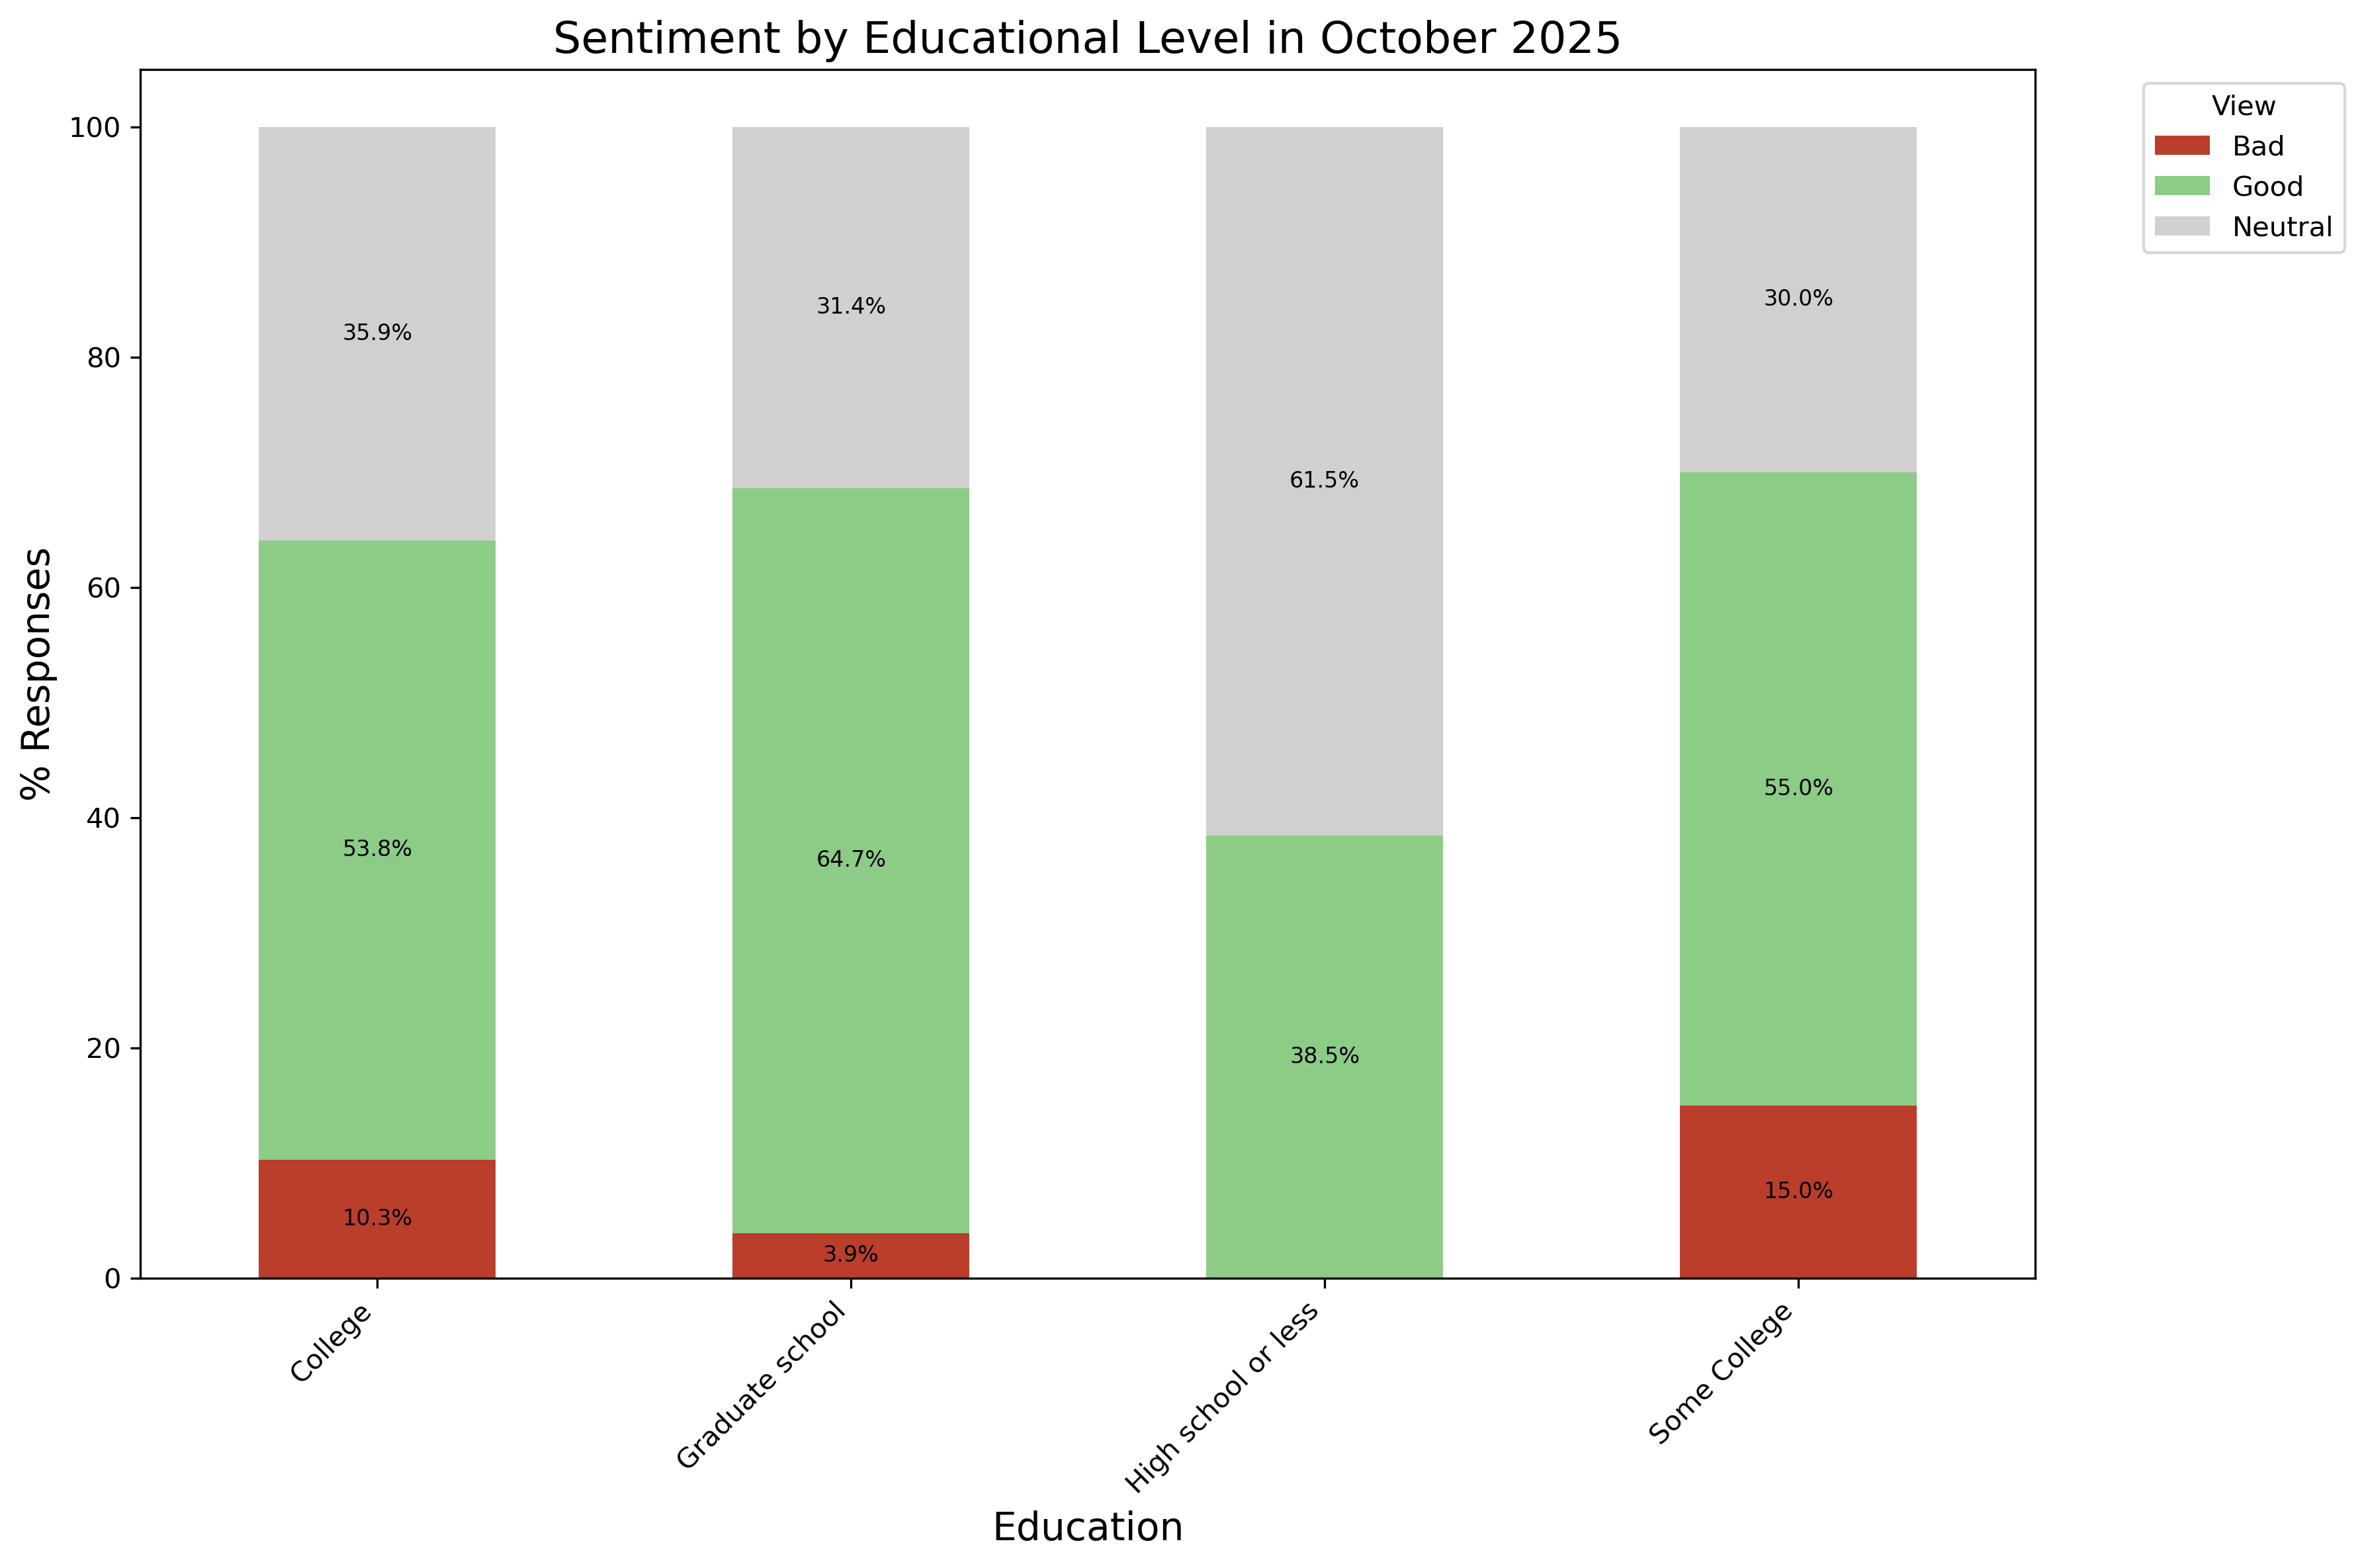

In [33]:
plot_stacked_bar_chart(oct25,
                       title='Sentiment by Educational Level in October 2025',
                       xlabel='Education',
                       ylabel='% Responses',
                       cat_col='What is your level of education?',
                       sent_col='How do you feel about Muslim people in America?')

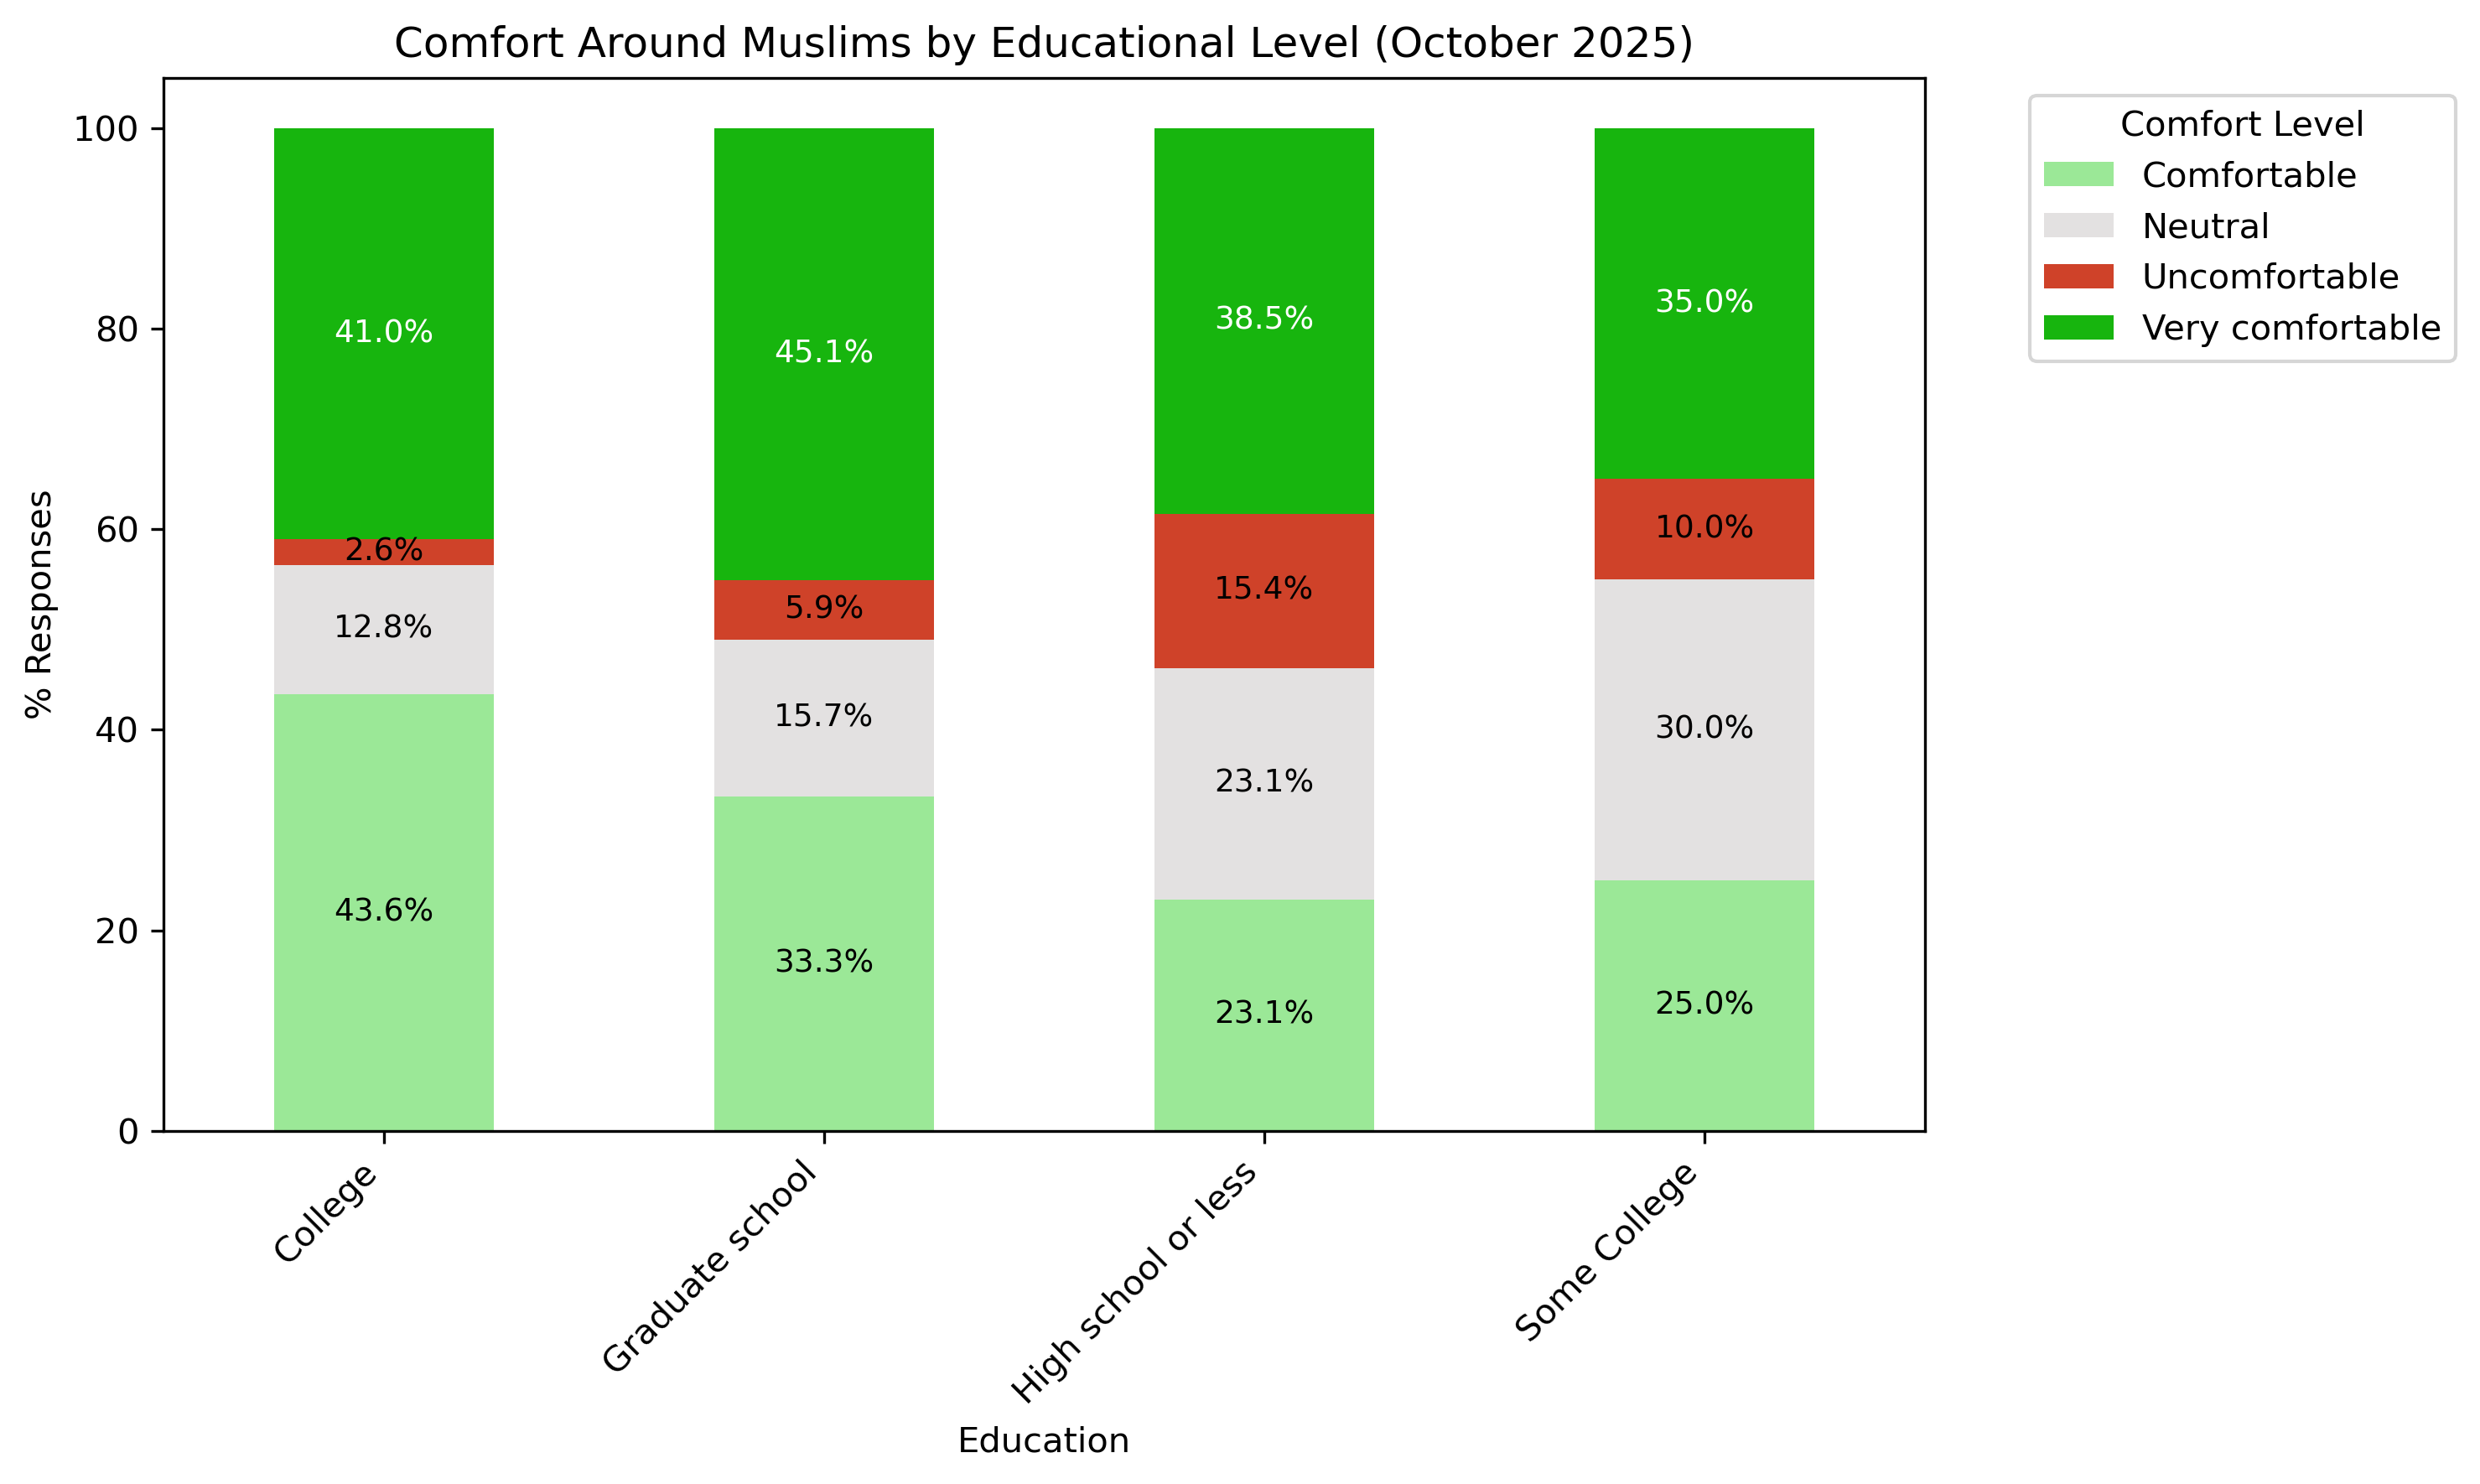

In [34]:
plot_comfort(oct25,
             category_col= 'What is your level of education?',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Educational Level (October 2025)',
             xlabel='Education',
             ylabel='% Responses')